In [1]:
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, SparsePCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

lund_folder = tc.get_folder_path('Wolgast Folder')
lund = tc.processed_dataset(lund_folder)

lund_combined_thesis_props = lund.get_combined_thesis_props_no_correlation()
lund_combined_thesis_props.keys()

No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Wolgast Gastrulation Labels//


Index(['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
       'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
       'centroid-1', 'centroid-2', 'image_stdev',
       'avg distance of 6 closest points',
       'stddev distance of 6 closest points', 'touching neighbor count',
       'aspect_ratio'],
      dtype='object')

In [2]:
saved_folder = tc.get_folder_path('hope')
embedding_7dims = np.load(saved_folder+'embedding 7dims 400 neighbours wolgast.npy')
predictions_k2_to_8 = np.load(saved_folder+'predictions for cluster numbers 2 - 8.npy')

In [3]:
# conversion factors for measurements with units
volume_cf = 0.69*0.69*0.69
distance_cf = 0.69

conversion_factors = [volume_cf,volume_cf,1,distance_cf,1,
                     1,1,1,1,
                     1,1,1,
                     distance_cf,
                     distance_cf,1,
                     1]

regionprops_w_units = lund_combined_thesis_props * conversion_factors

In [4]:
predictions_5cl_df = pd.DataFrame({'prediction':predictions_k2_to_8[3]})
regprops_w_predictions = pd.concat([regionprops_w_units,predictions_5cl_df],axis = 1)

cluster_regprops_list = [regprops_w_predictions[regprops_w_predictions['prediction']==i] for i in range(5)]

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

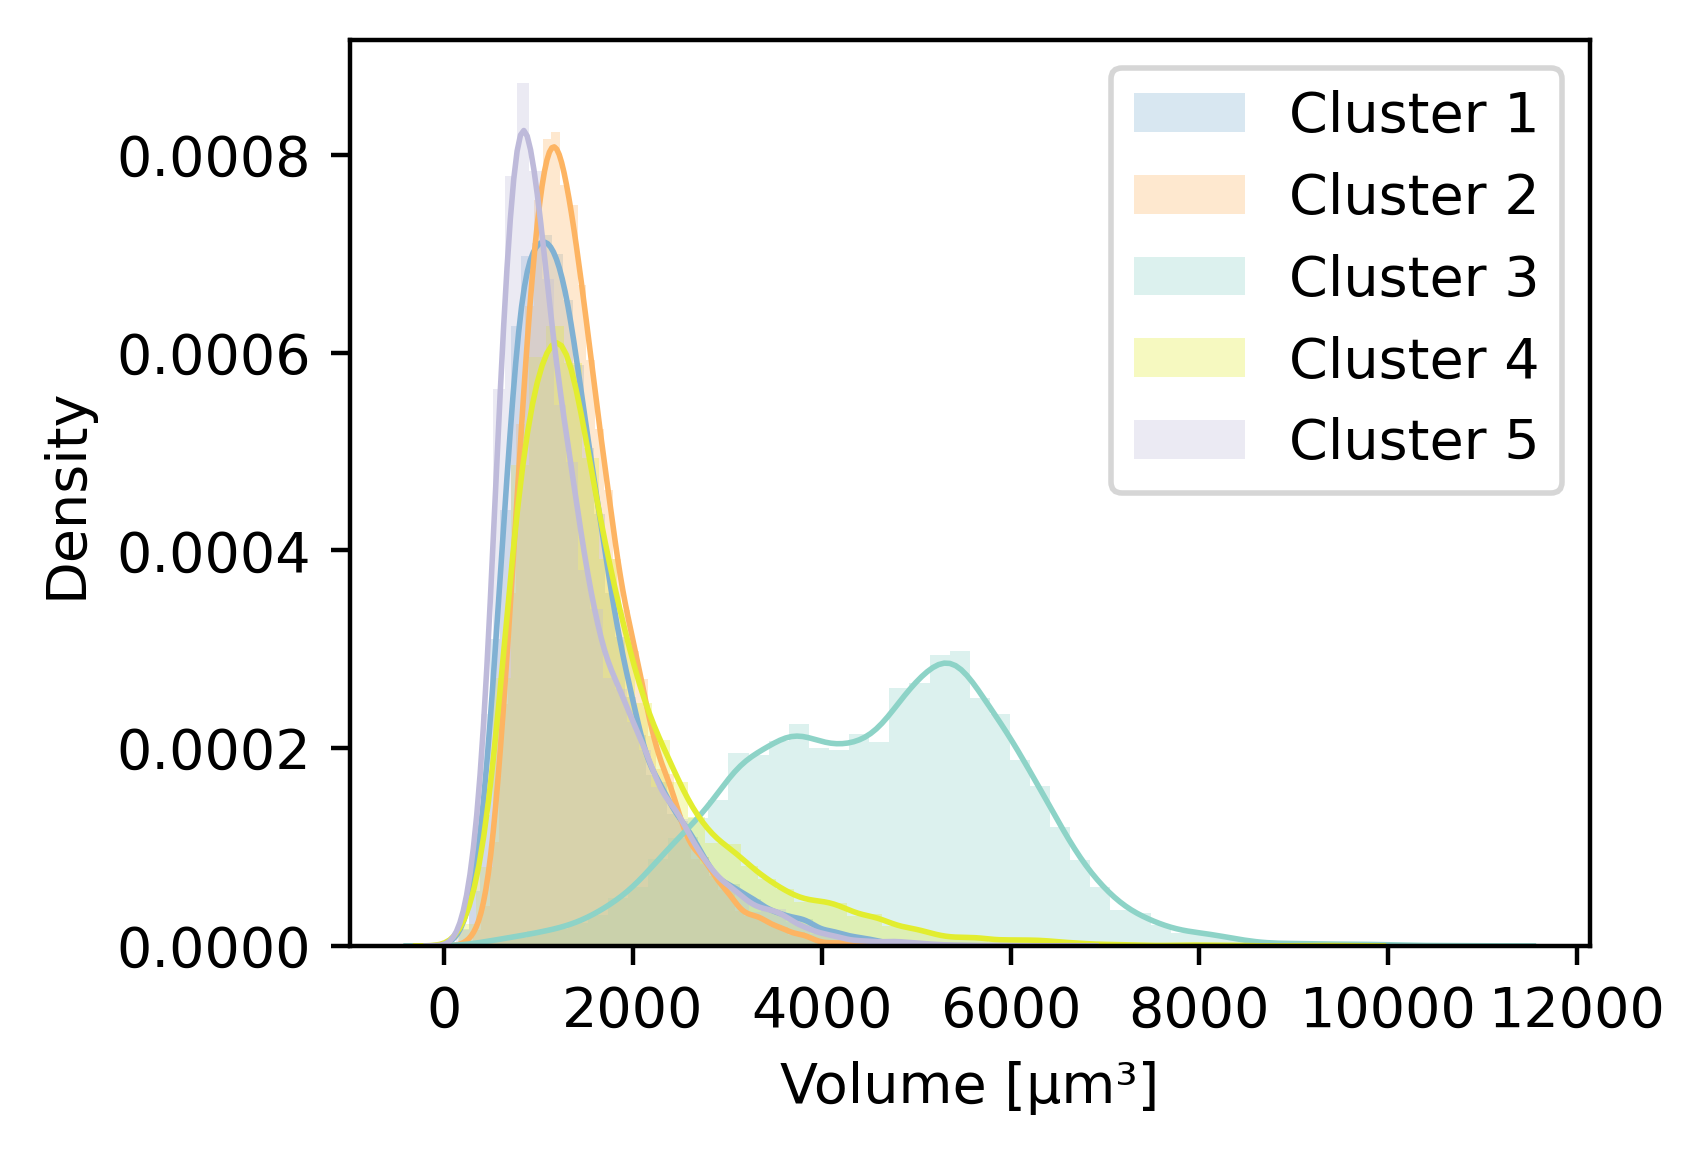

In [5]:
import seaborn as sns
areas = [prop['area'] for prop in cluster_regprops_list]

names = ['Cluster {}'.format(i+1) for i in range(5)]
nothing, cmap_plots = tc.napari_and_plot_cmap_from_hexcsv()


def plot_cluster_comparison(measurements,x_axis_title,names,
                            kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':0.5})):
    
    # Renaming X-Axis
    new_name_props = [prop.rename(x_axis_title) for prop in measurements]
    
    
    kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})
    plt.figure(figsize =(4,3), dpi = 400)
    
    for i,Area, name in zip(range(5),new_name_props, names):
        sns.distplot(Area, label = name,color=cmap_plots[i] ,**kwargs)
    plt.legend()
    
plot_cluster_comparison(areas,'Volume [\u03BCm\u00b3]',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

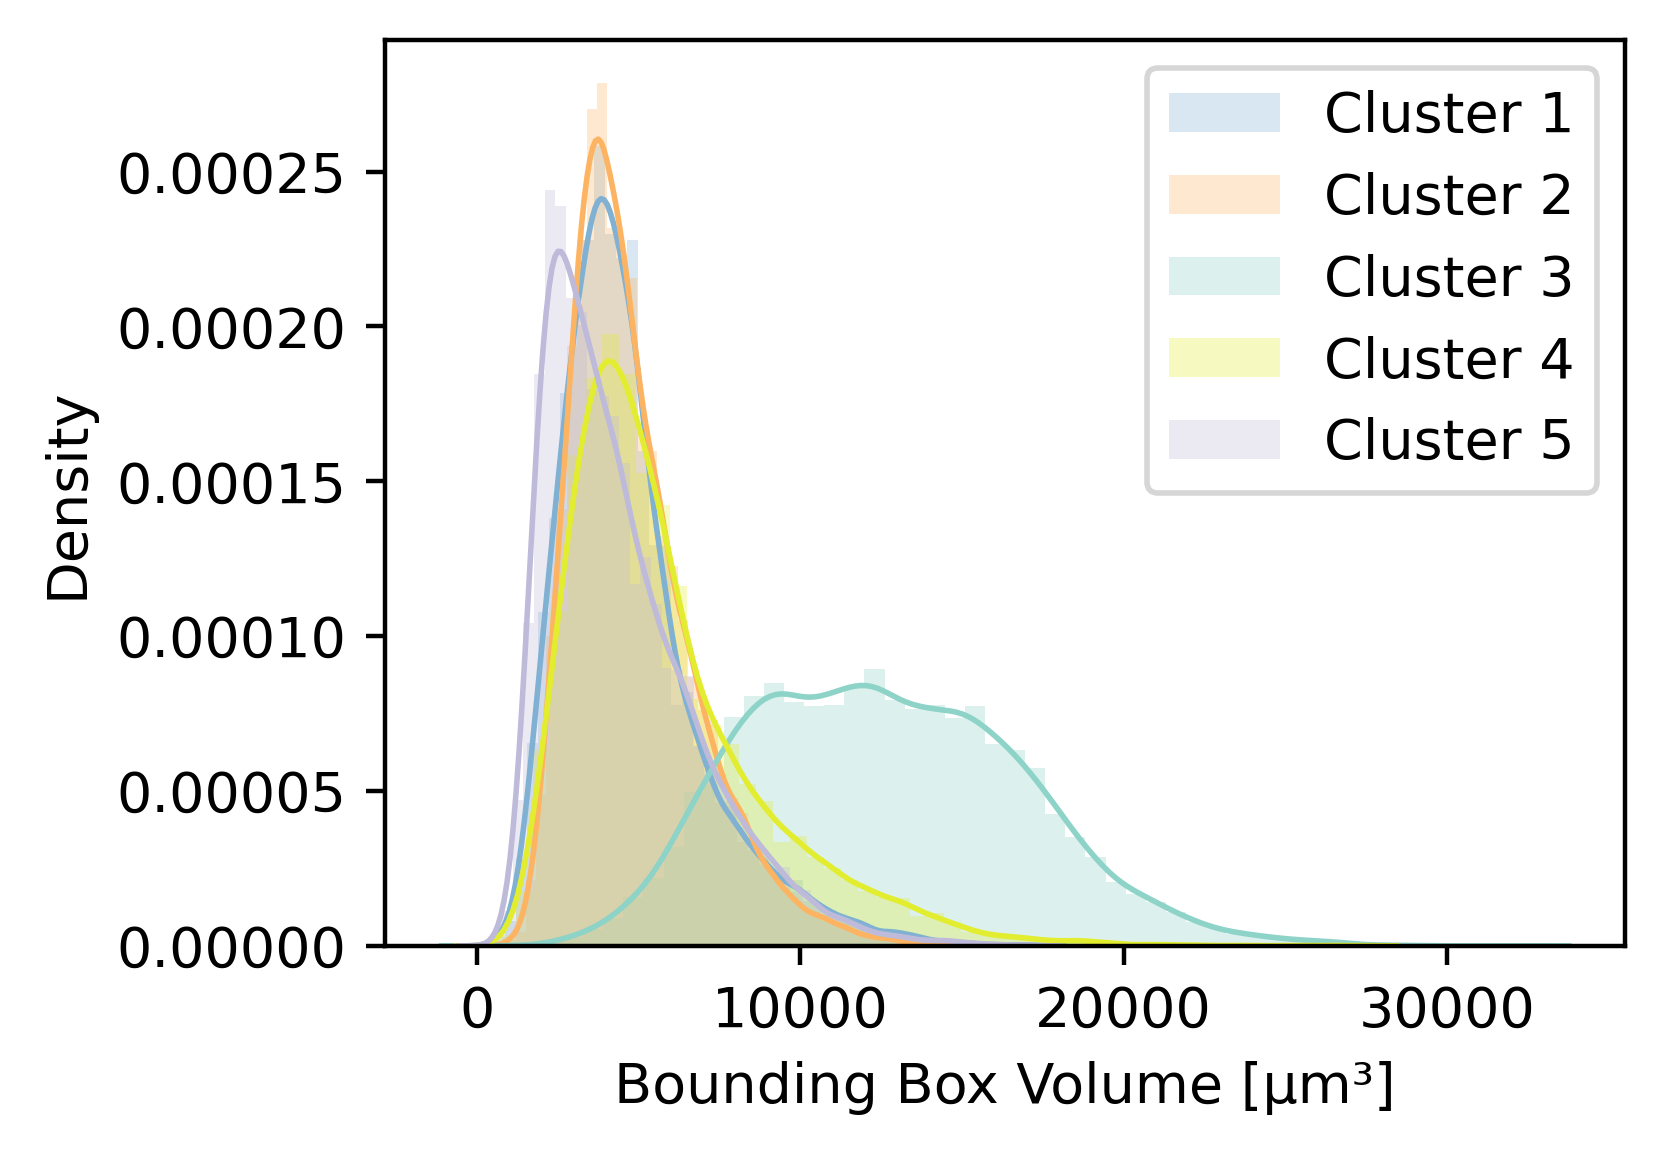

In [6]:
bbox_area = [prop['bbox_area'] for prop in cluster_regprops_list]

plot_cluster_comparison(bbox_area, 'Bounding Box Volume [\u03BCm\u00b3]',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

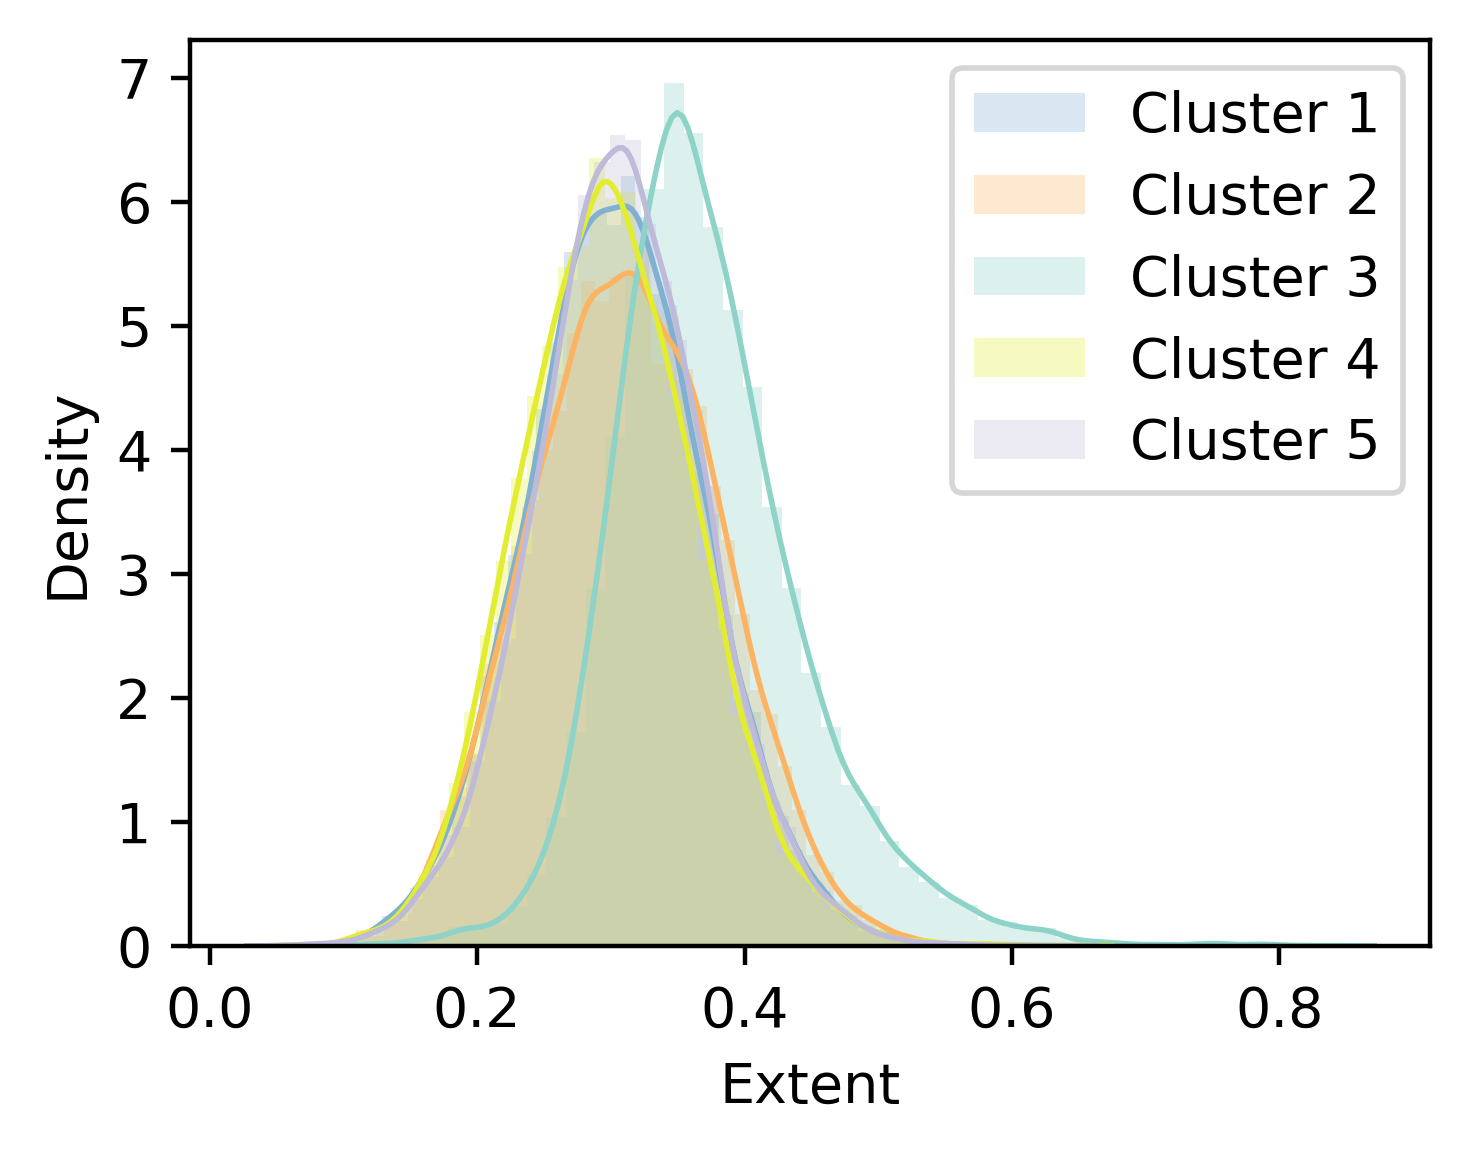

In [7]:
extent = [prop['extent'] for prop in cluster_regprops_list]

plot_cluster_comparison(extent, 'Extent',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(10.0, 55.0)

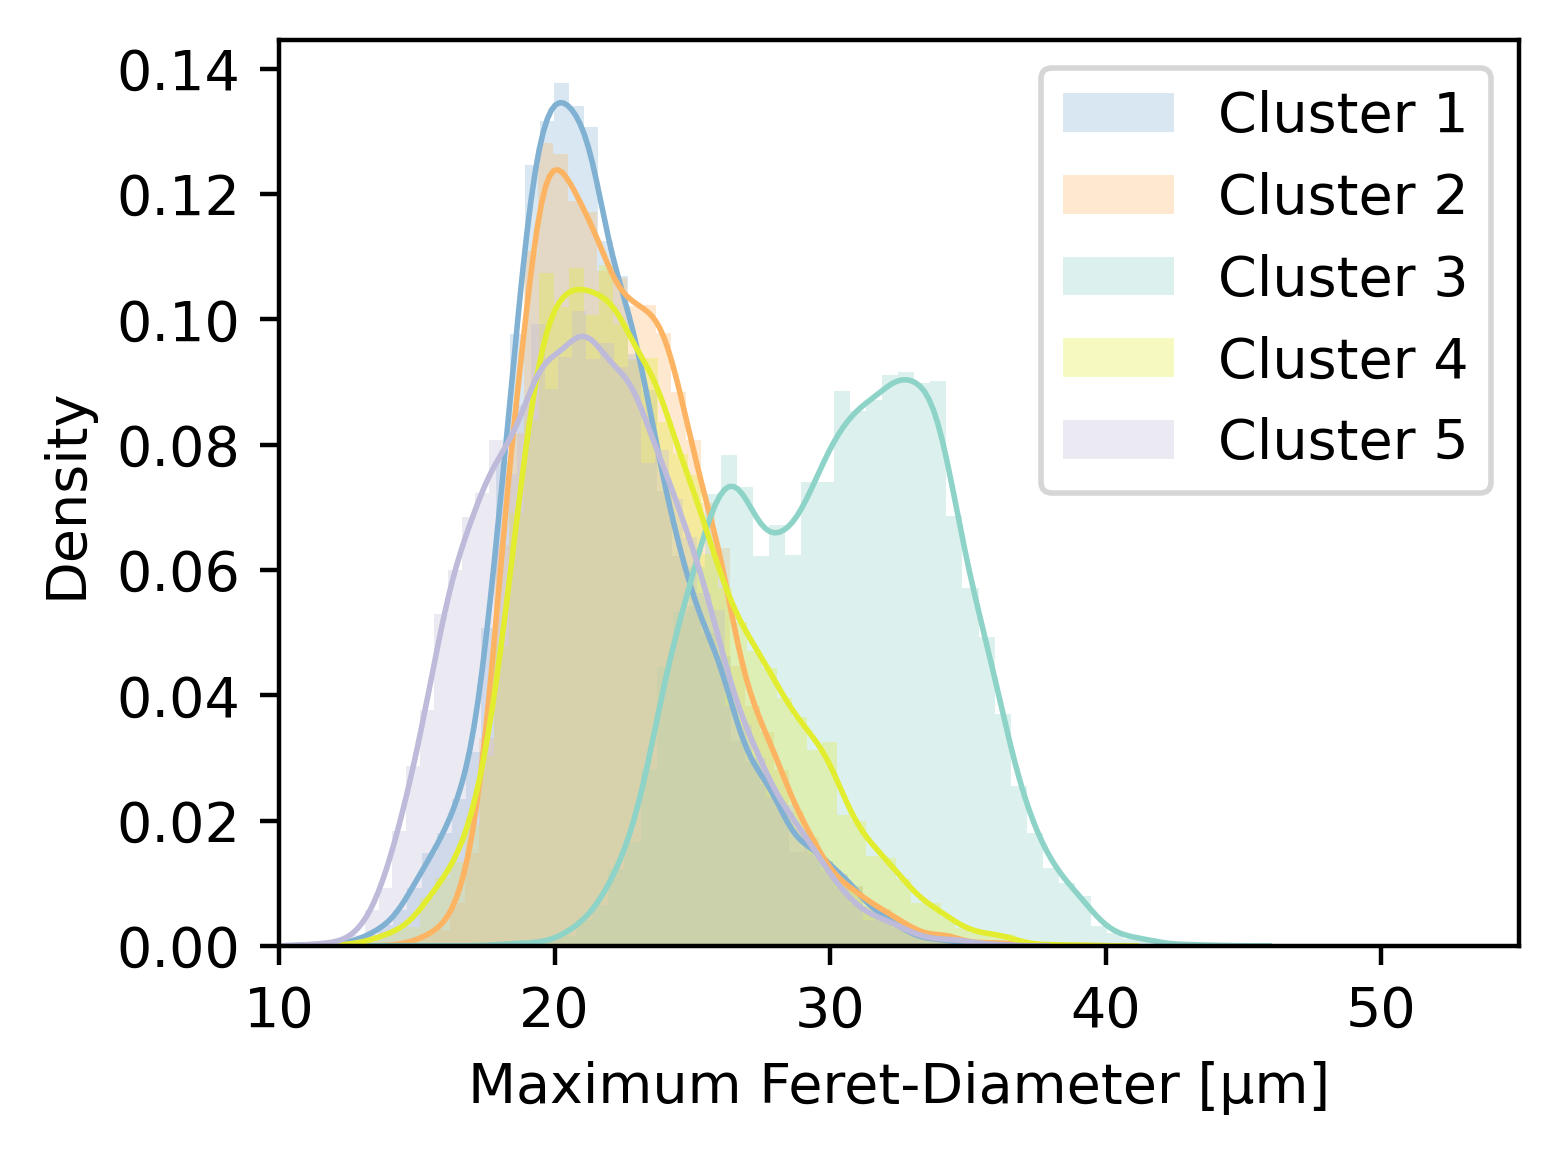

In [8]:
feret_diam = [prop['feret_diameter_max'] for prop in cluster_regprops_list]

plot_cluster_comparison(feret_diam, 'Maximum Feret-Diameter [\u03BCm]',names)
plt.xlim([10,55])

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

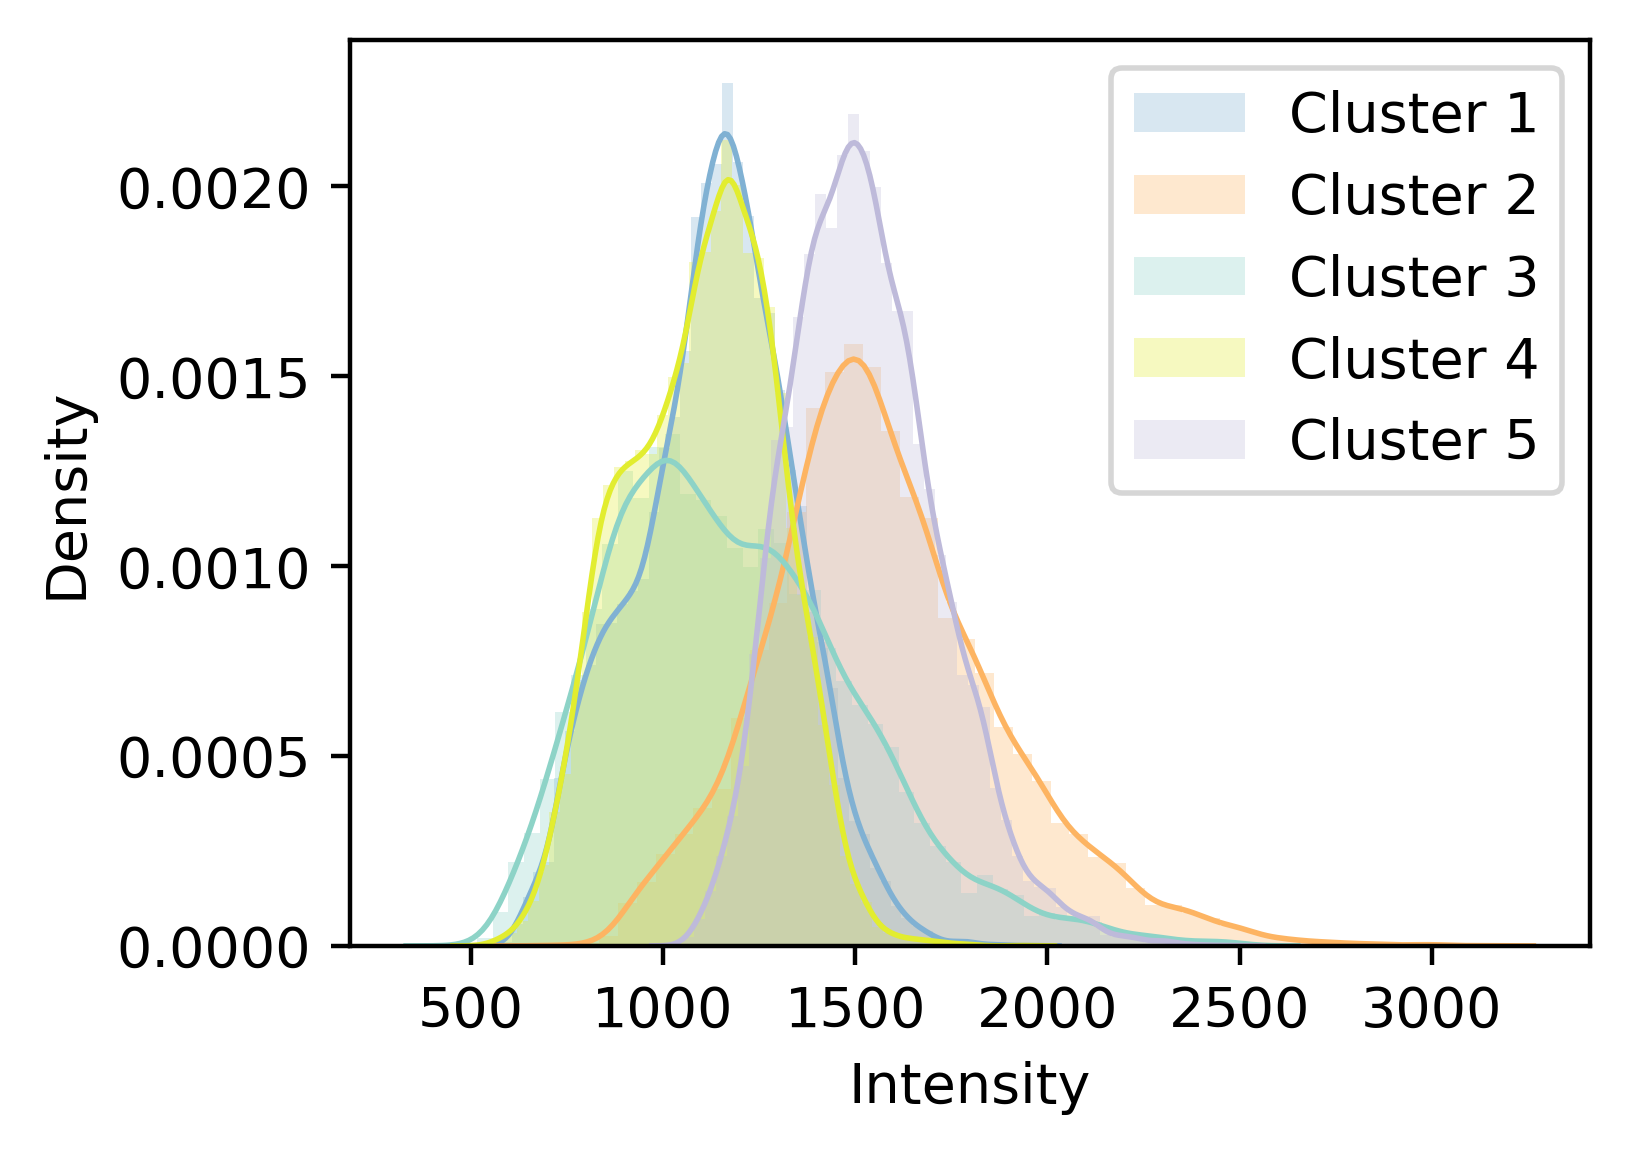

In [9]:
max_int = [prop['max_intensity'] for prop in cluster_regprops_list]

plot_cluster_comparison(max_int, 'Intensity',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(100.0, 1500.0)

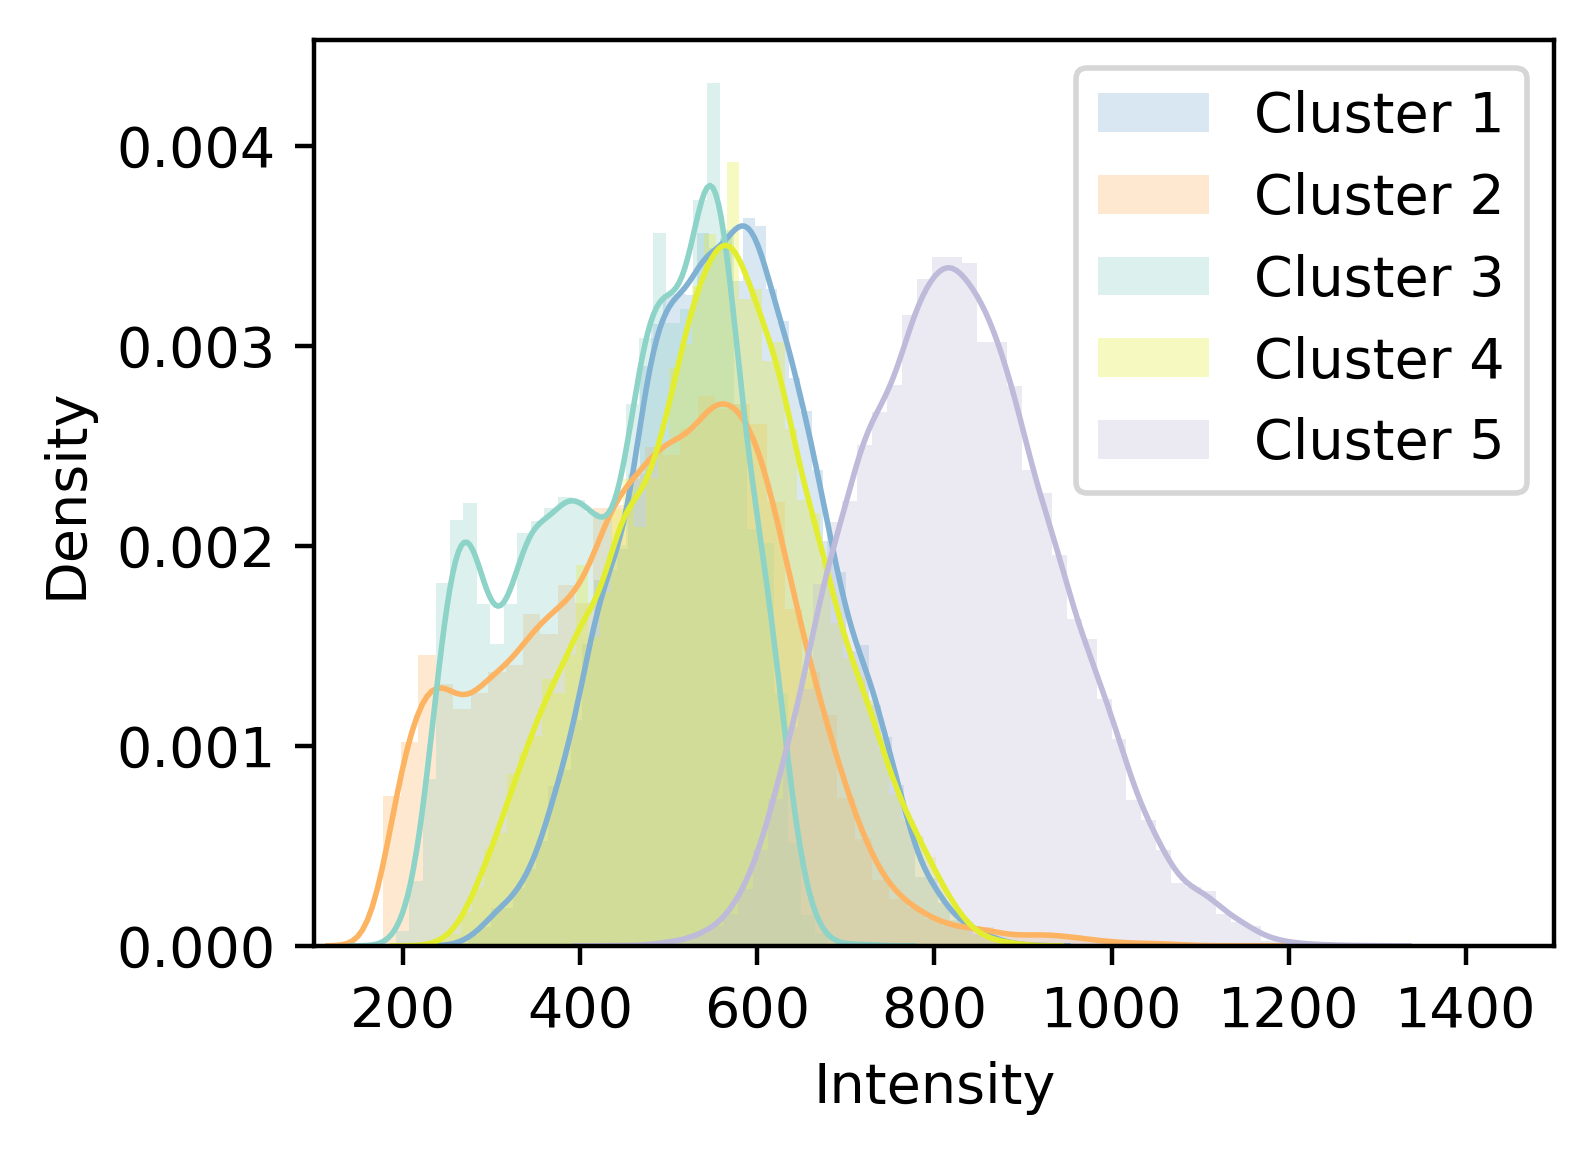

In [10]:
min_int = [prop['min_intensity'] for prop in cluster_regprops_list]

plot_cluster_comparison(min_int, 'Intensity',names)
plt.xlim([100,1500])

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

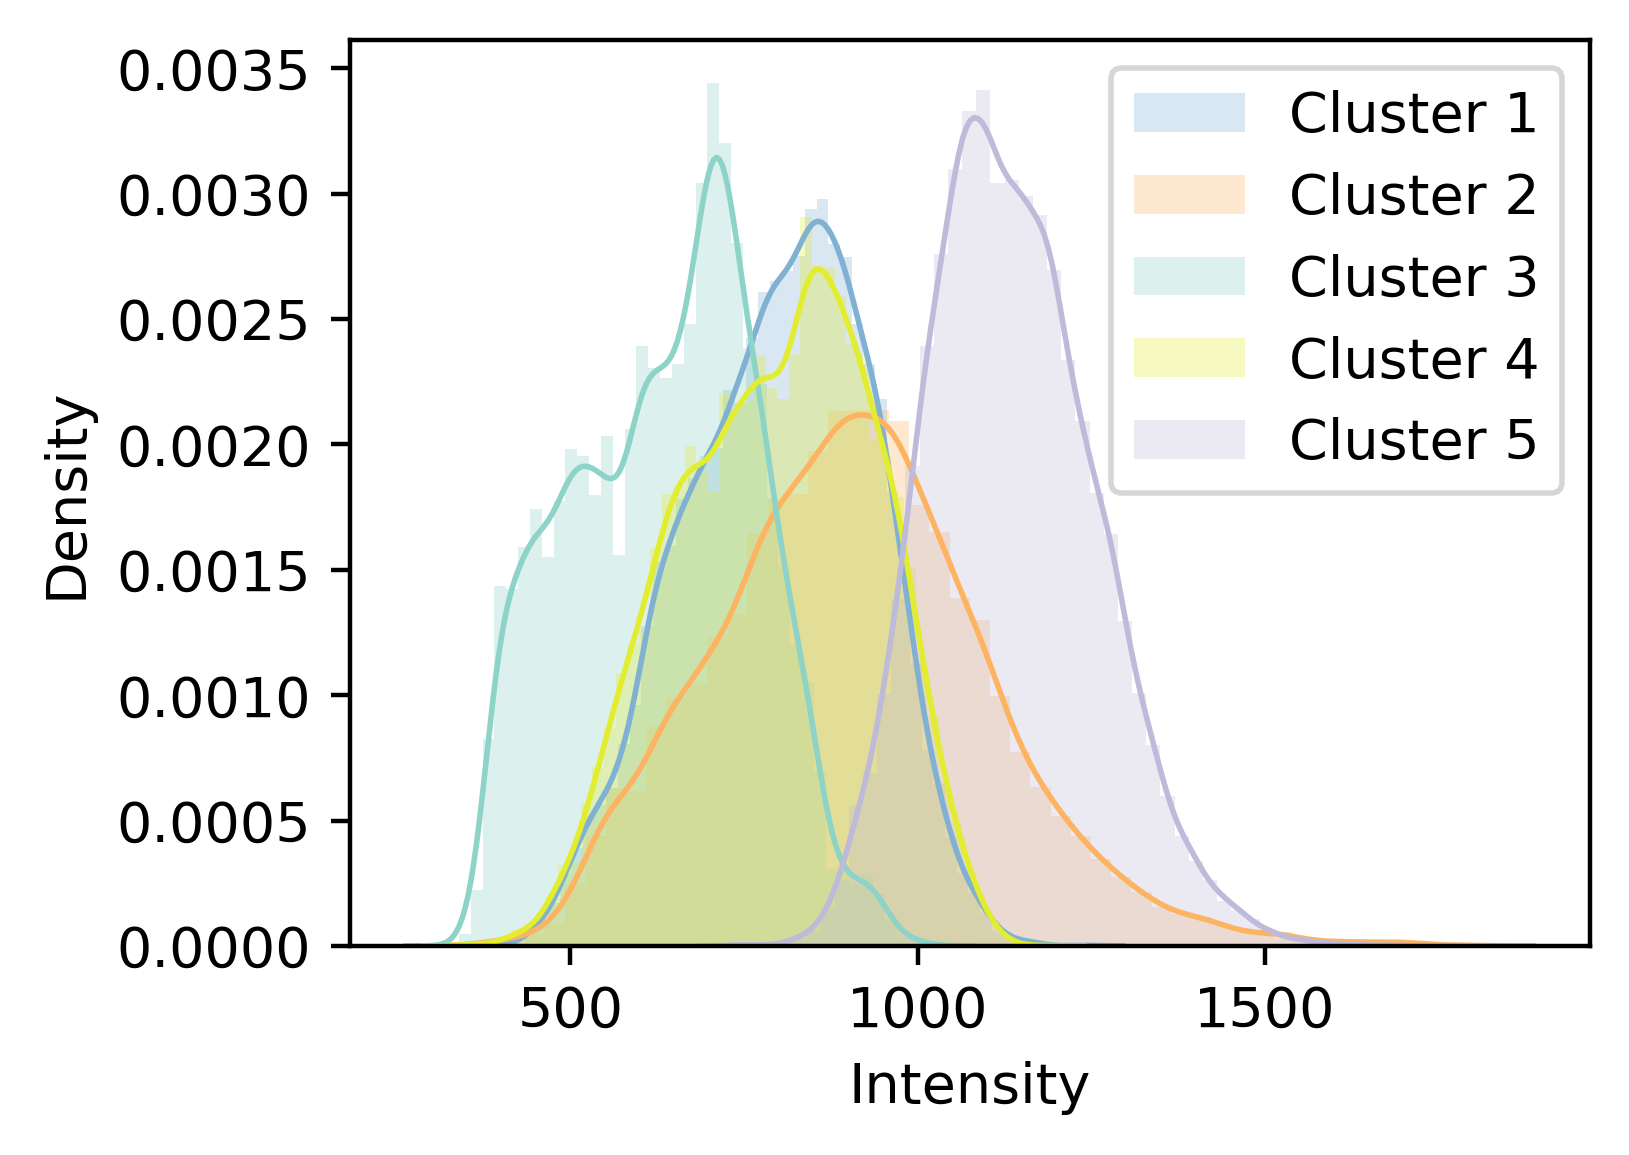

In [11]:
mean_int = [prop['mean_intensity'] for prop in cluster_regprops_list]

plot_cluster_comparison(mean_int, 'Intensity',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

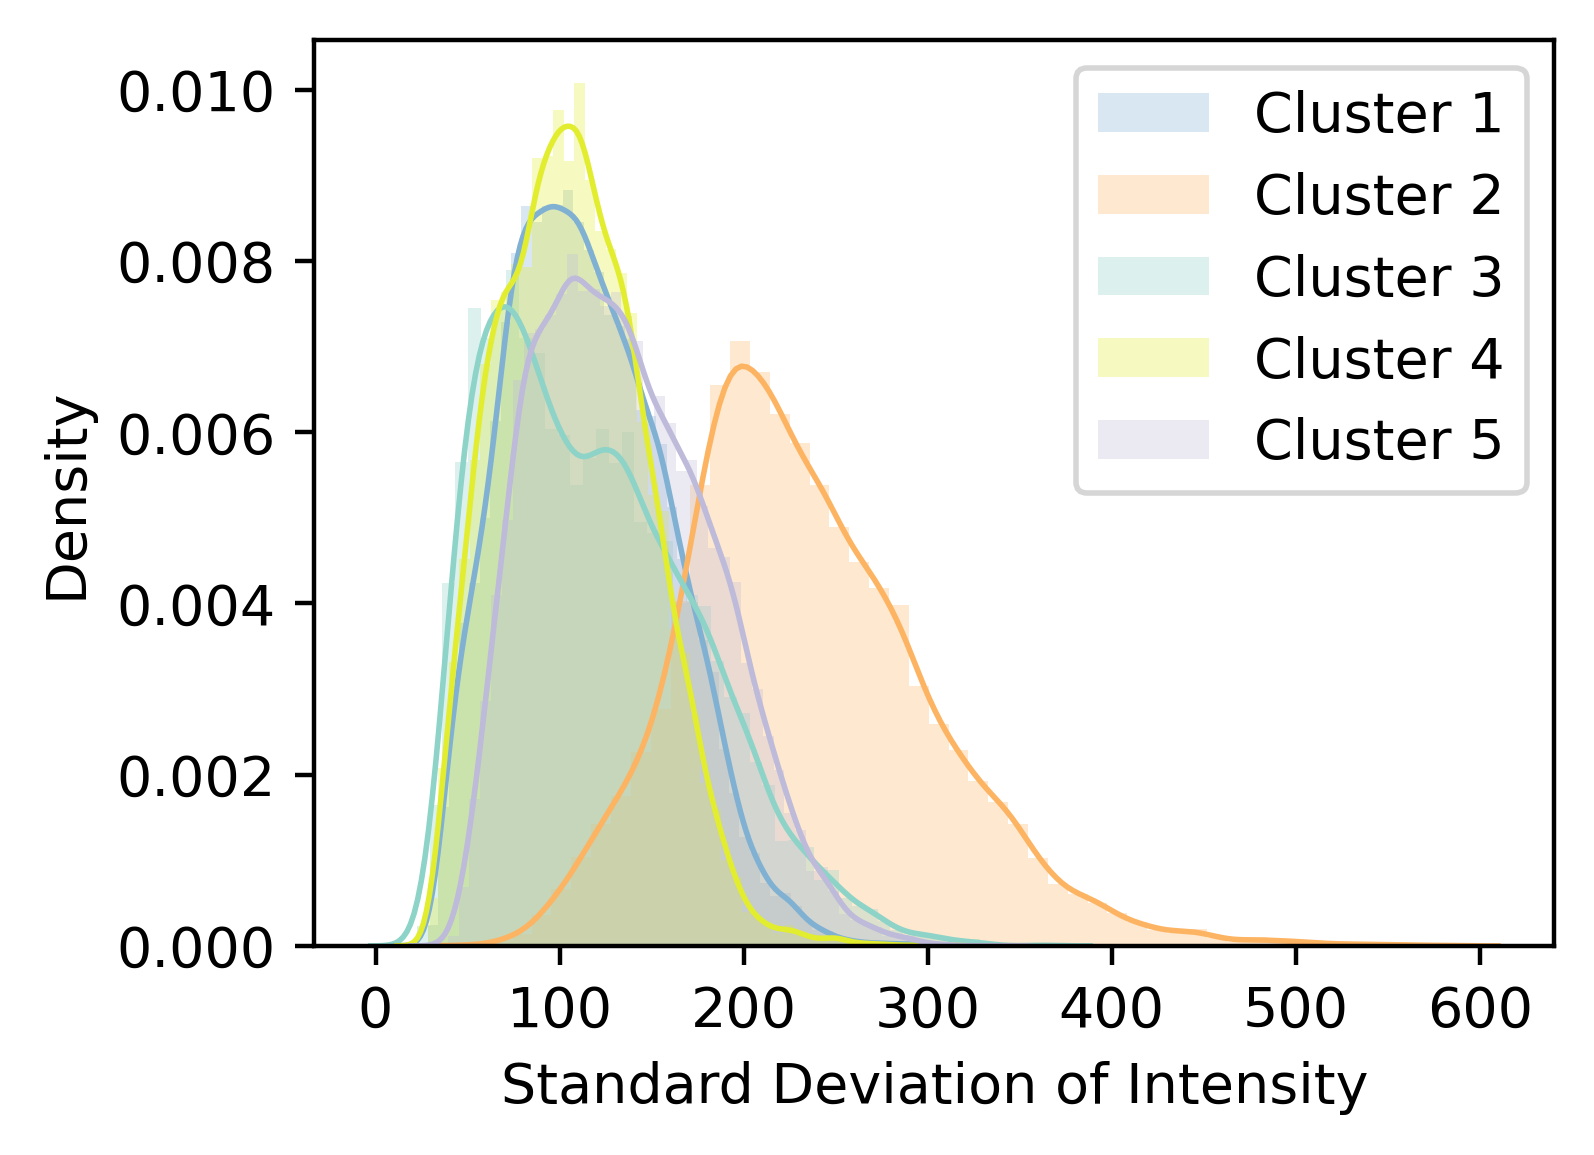

In [12]:
stdev_int = [prop['image_stdev'] for prop in cluster_regprops_list]

plot_cluster_comparison(stdev_int, 'Standard Deviation of Intensity',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

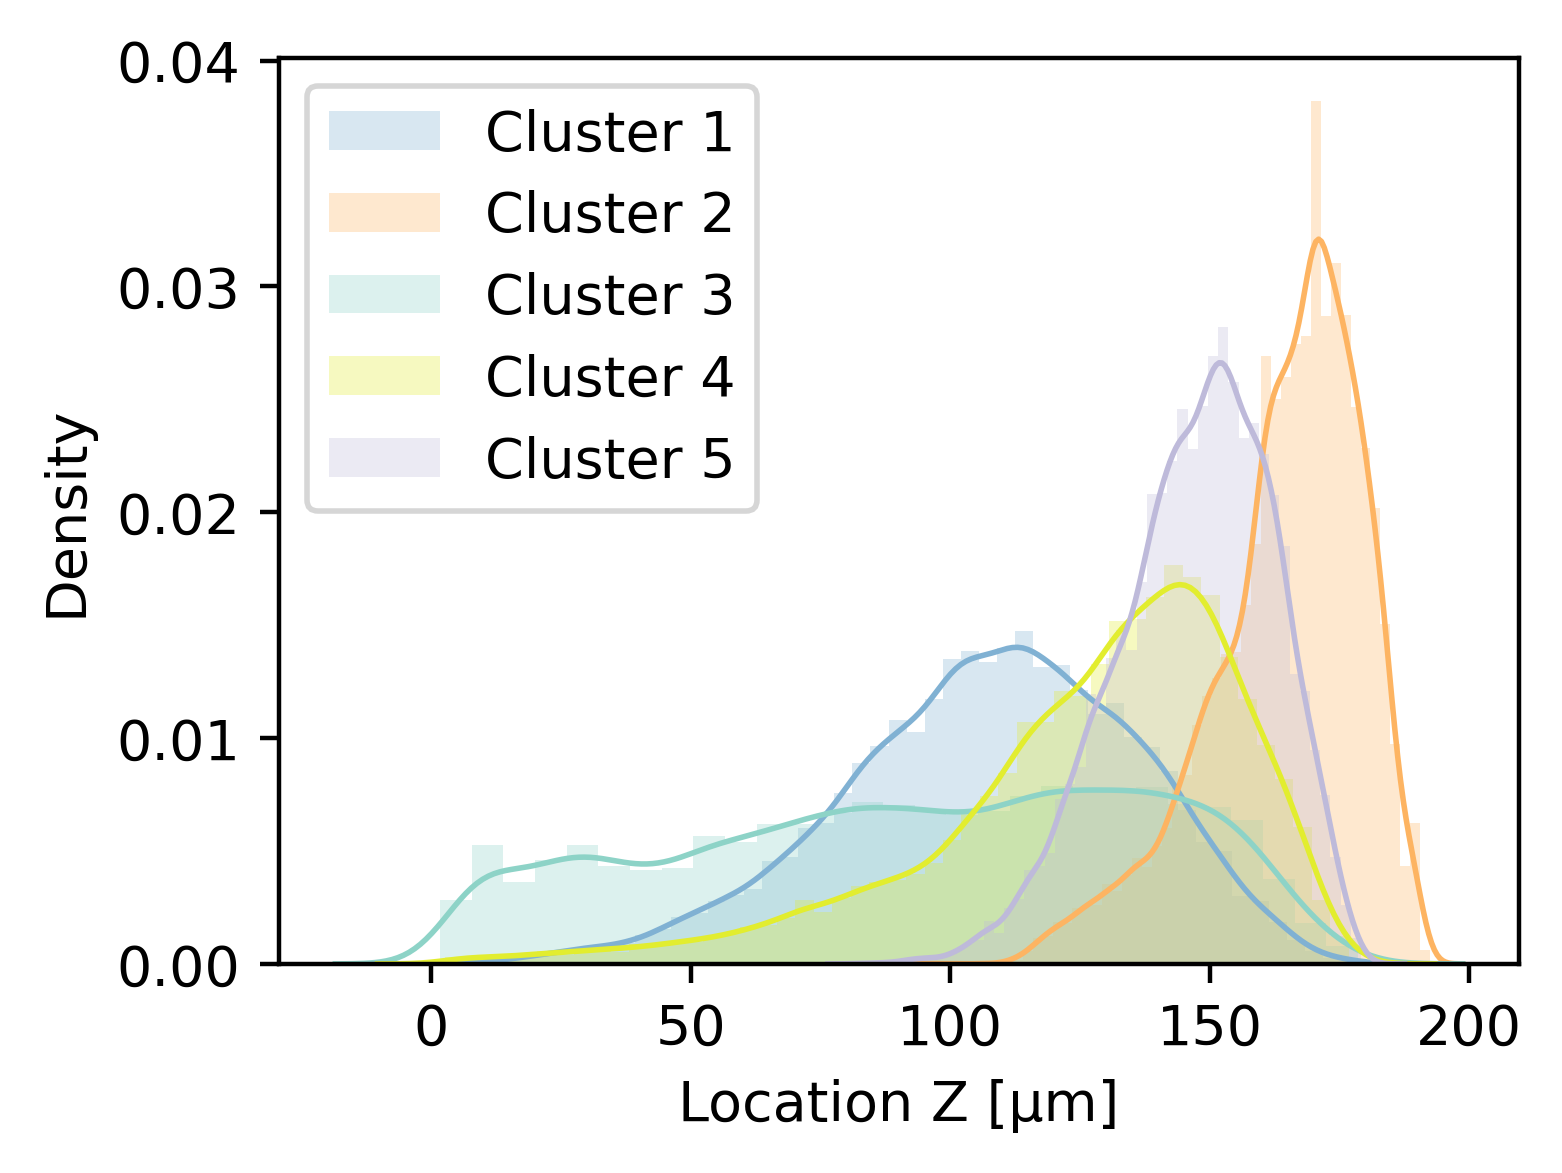

In [13]:
cent_0 = [prop['centroid-0']*distance_cf for prop in cluster_regprops_list]

plot_cluster_comparison(cent_0, 'Location Z [\u03BCm]',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(-200.0, 800.0)

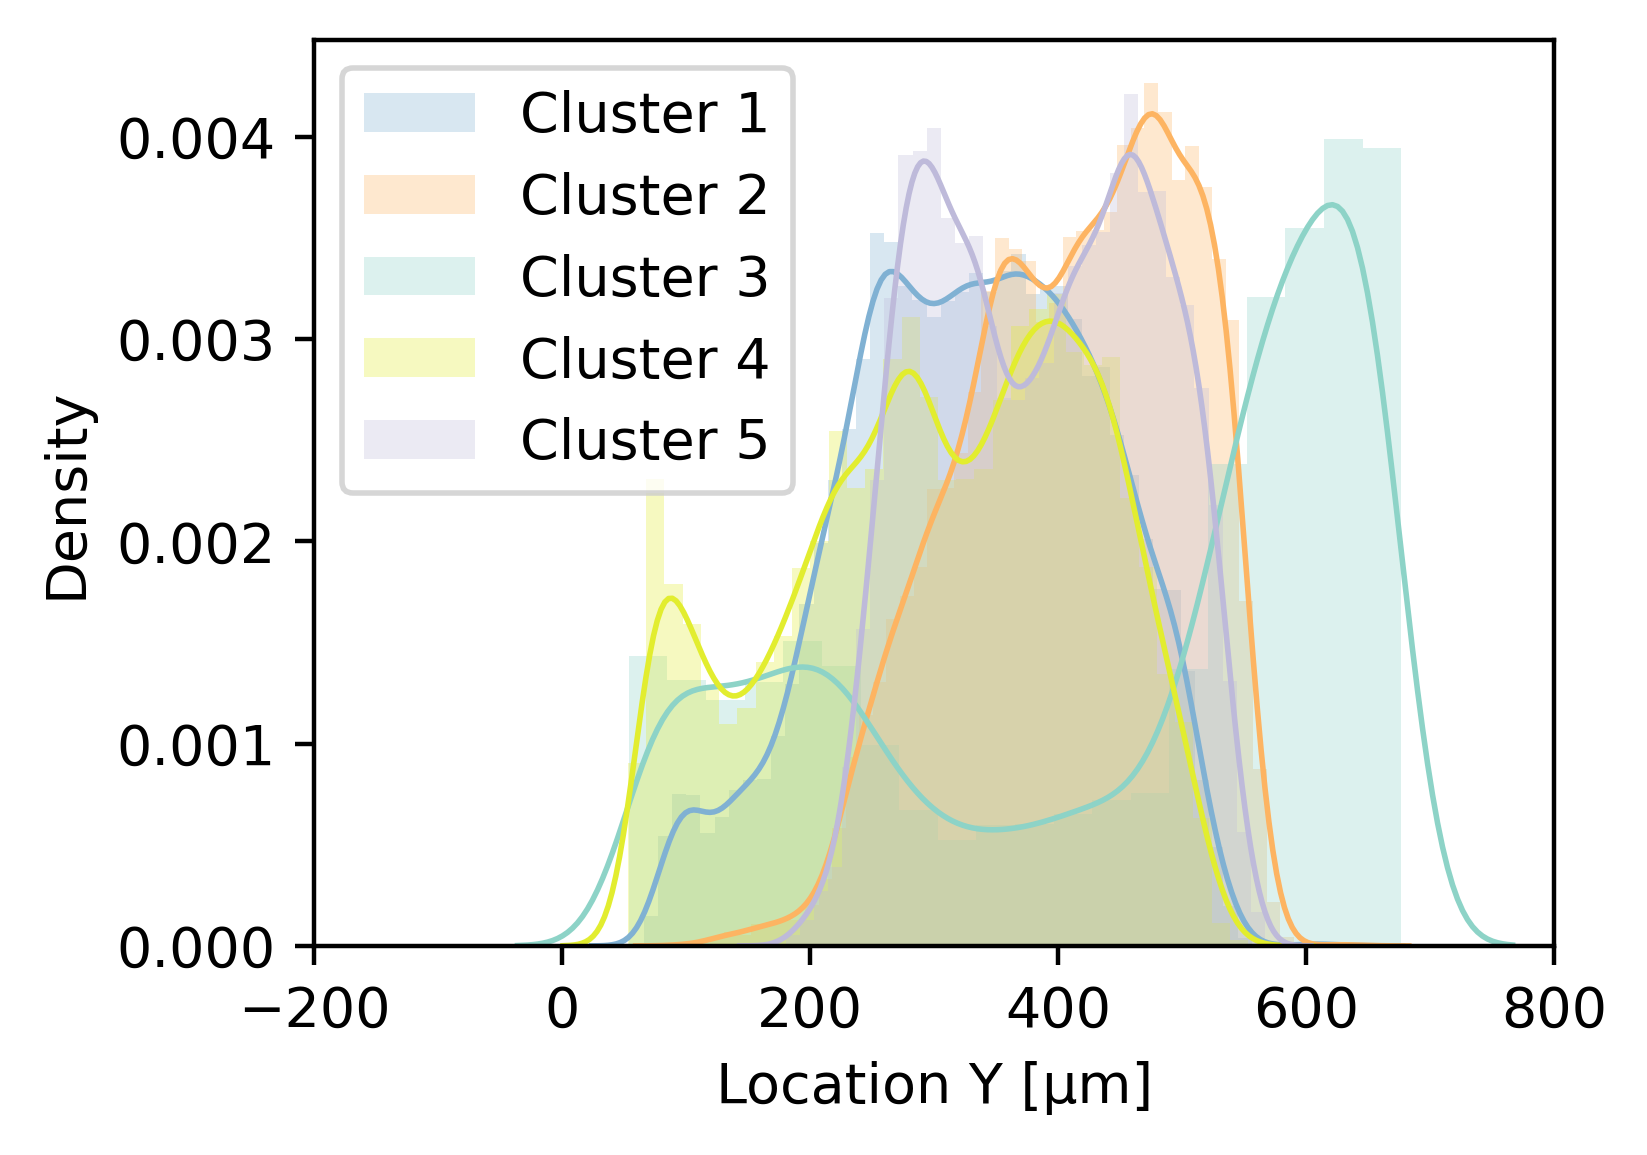

In [14]:
cent_1 = [prop['centroid-1']*distance_cf for prop in cluster_regprops_list]

plot_cluster_comparison(cent_1, 'Location Y [\u03BCm]',names)
plt.xlim([-200,800])

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(0.0, 550.0)

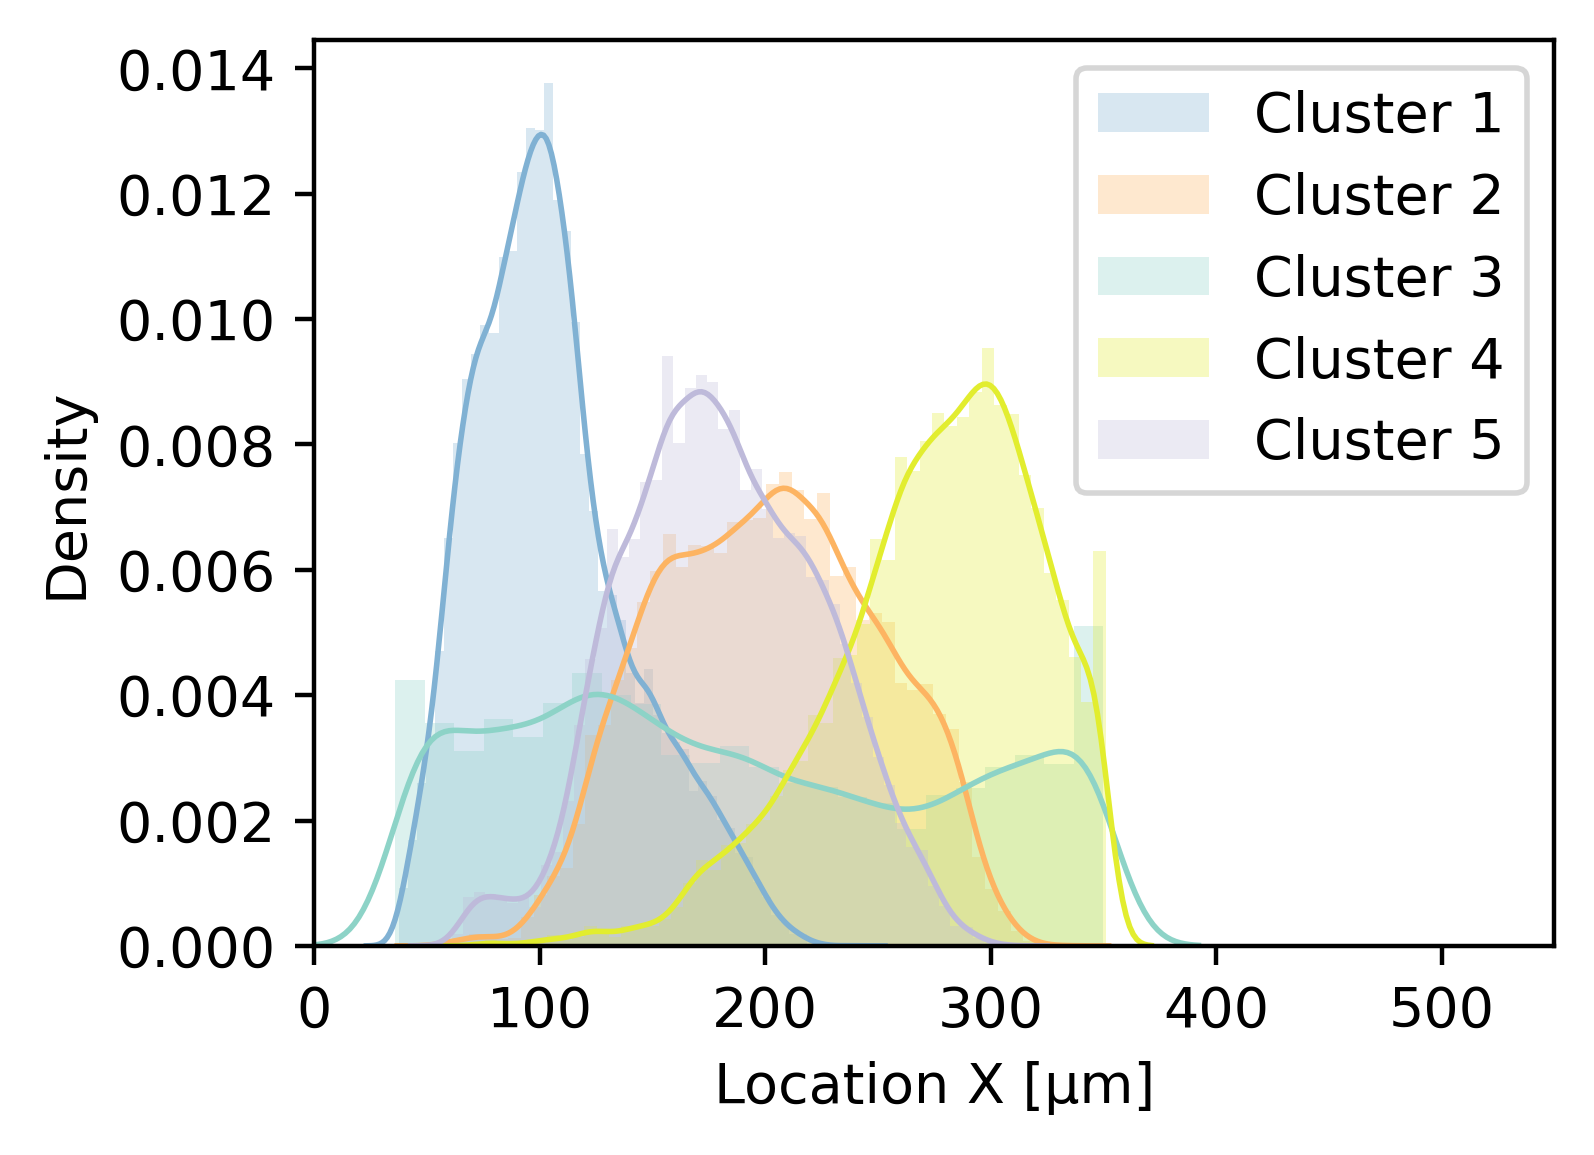

In [15]:
cent_2 = [prop['centroid-2']*distance_cf for prop in cluster_regprops_list]

plot_cluster_comparison(cent_2, 'Location X [\u03BCm]',names)
plt.xlim([0,550])

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(5.0, 45.0)

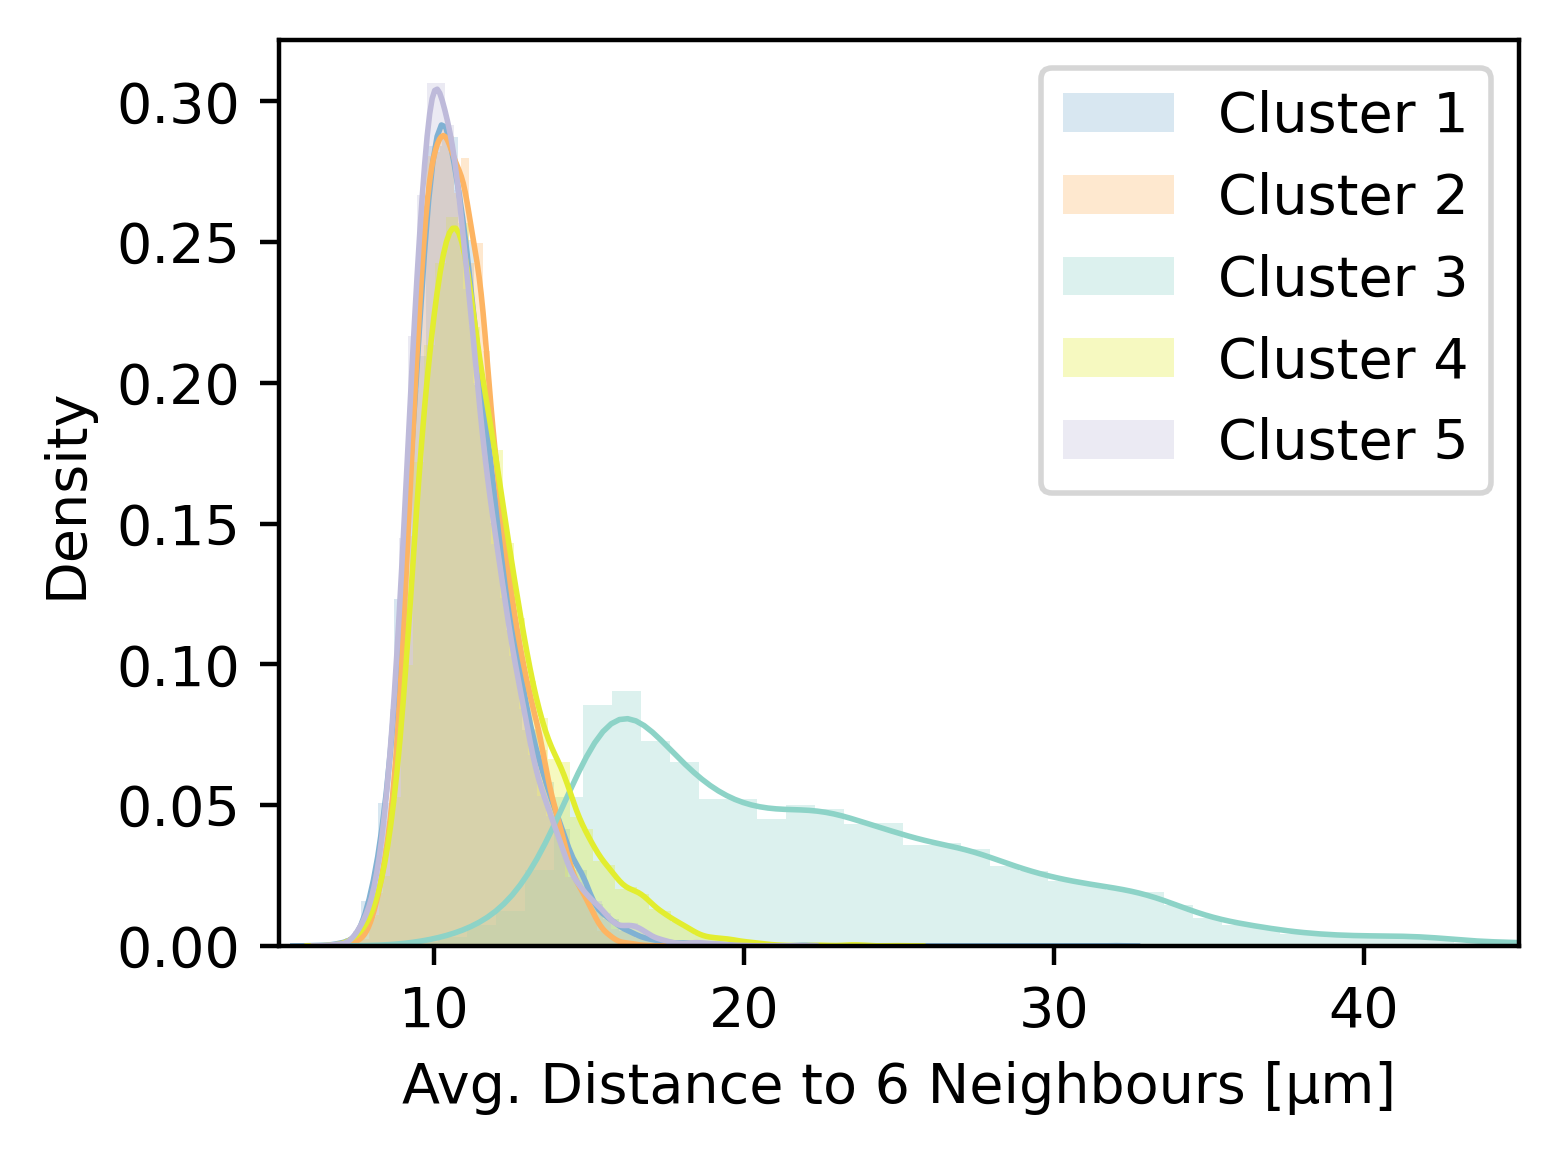

In [16]:

        
avg_dist = [prop['avg distance of 6 closest points'] for prop in cluster_regprops_list]

plot_cluster_comparison(avg_dist, 'Avg. Distance to 6 Neighbours [\u03BCm]',names)
plt.xlim([5,45])

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(0.0, 6.0)

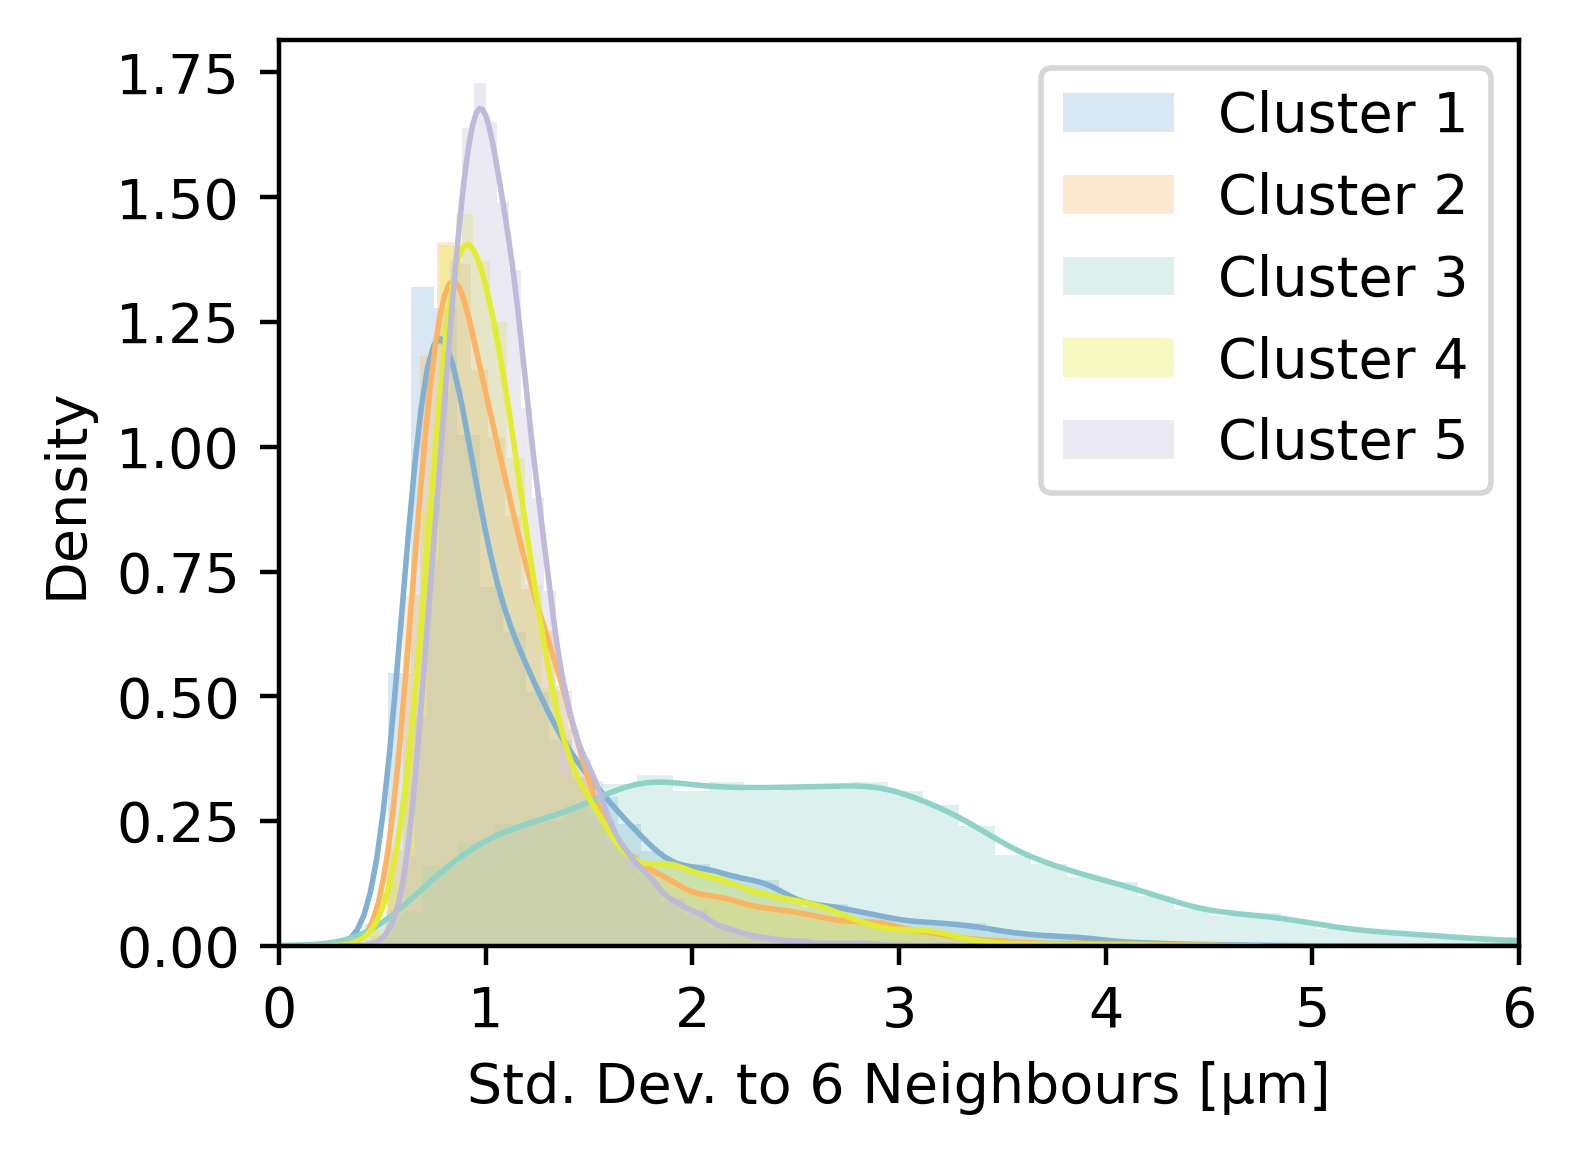

In [22]:
stdev_dist = [prop['stddev distance of 6 closest points'] for prop in cluster_regprops_list]

plot_cluster_comparison(stdev_dist, 'Std. Dev. to 6 Neighbours [\u03BCm]',names)
plt.xlim([0,6])

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histo

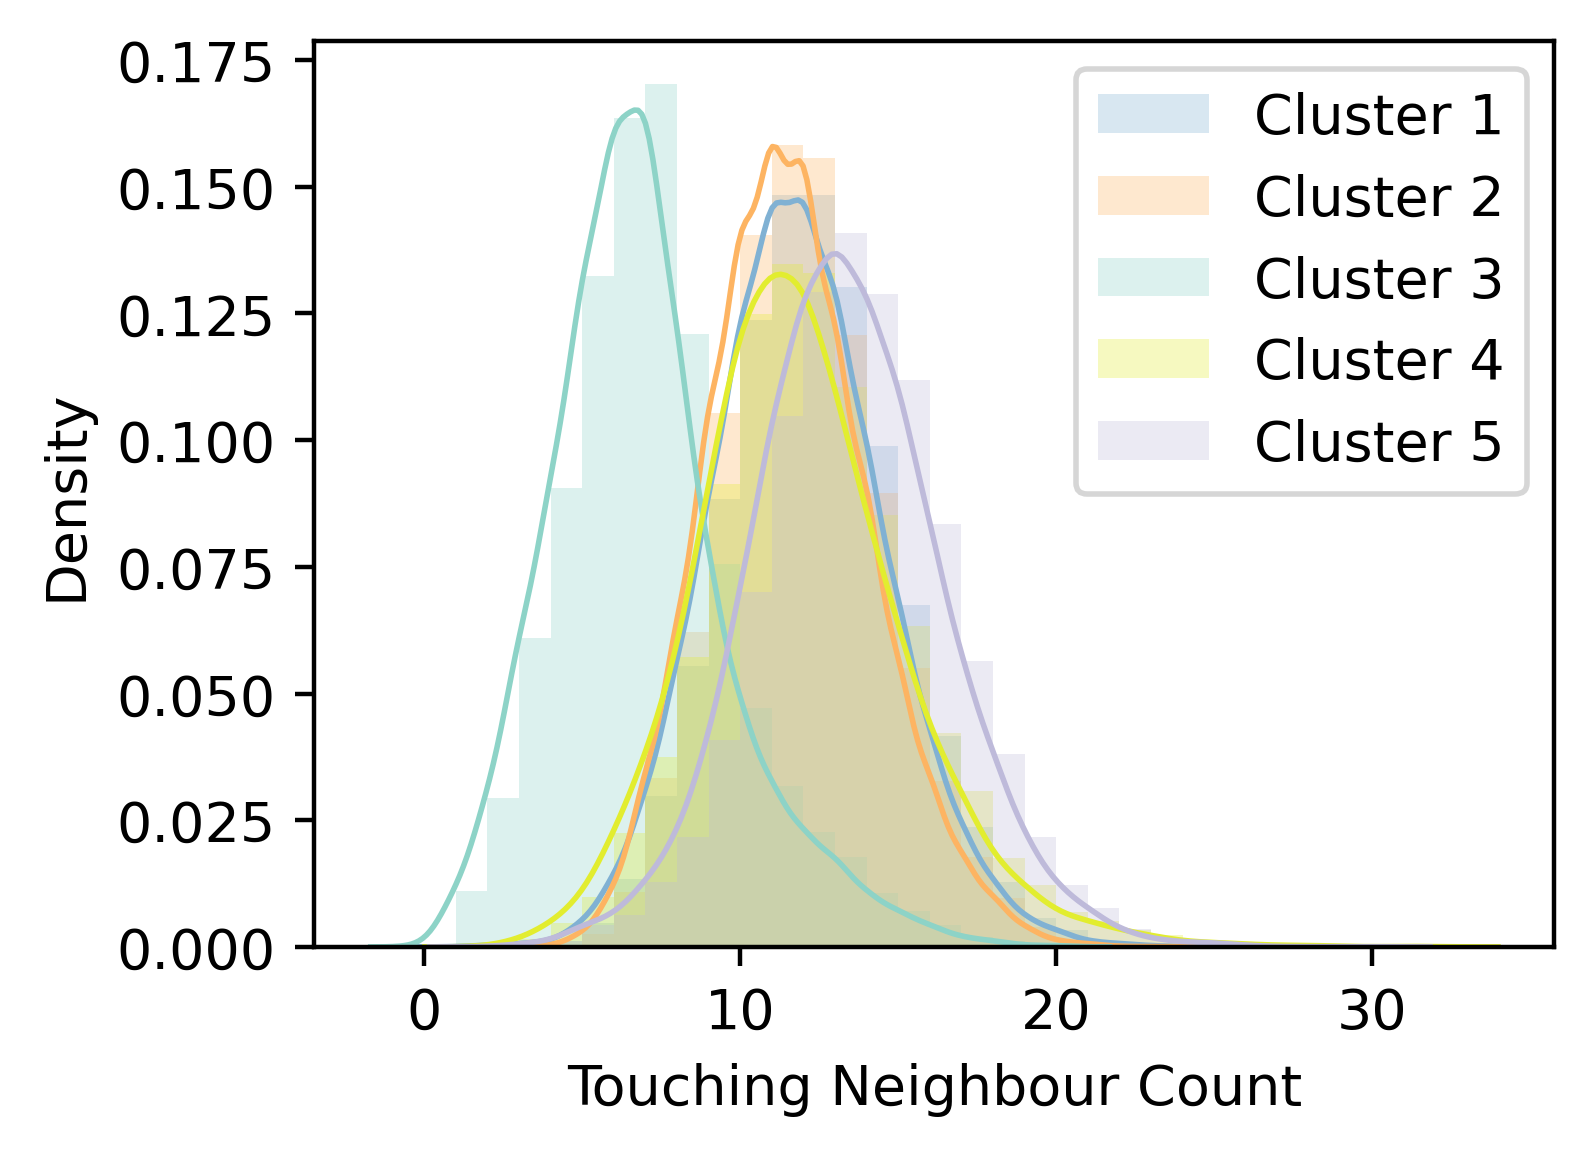

In [19]:
def plot_cluster_comparison_tnc(measurements,x_axis_title,names,
                            kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1}),
                            bins = None):
    
    # Renaming X-Axis
    new_name_props = [prop.rename(x_axis_title) for prop in measurements]
    
    
    
    plt.figure(figsize =(4,3), dpi = 400)
    
    for i,Area, name in zip(range(5),new_name_props, names):
        sns.distplot(Area, bins=bins ,label = name,color=cmap_plots[i] ,**kwargs)
    plt.legend()


tnc = [prop['touching neighbor count'] for prop in cluster_regprops_list]

plot_cluster_comparison_tnc(tnc, 'Touching Neighbour Count',names, bins = range(31), 
                        kwargs = dict(hist_kws={'alpha':0.3}, 
                                      kde_kws={'linewidth':1, 
                                               'bw':0.2}))

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

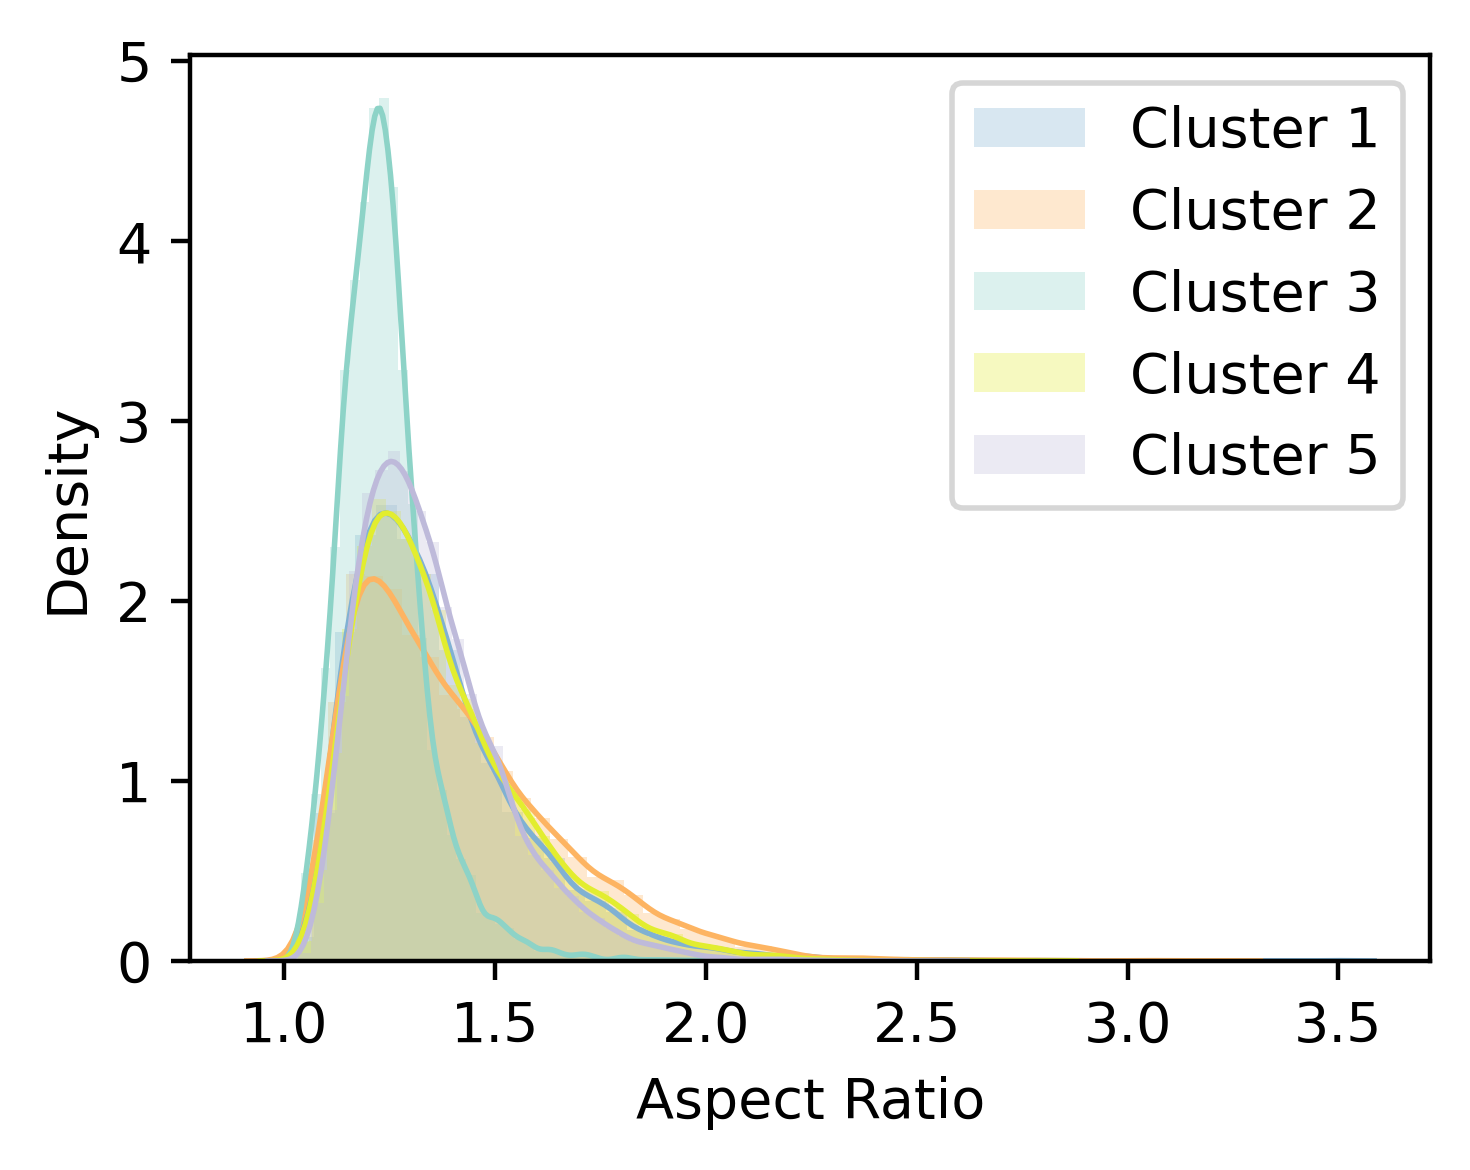

In [20]:
aspect = [prop['aspect_ratio'] for prop in cluster_regprops_list]

plot_cluster_comparison(aspect, 'Aspect Ratio',names)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(0.4, 1.0)

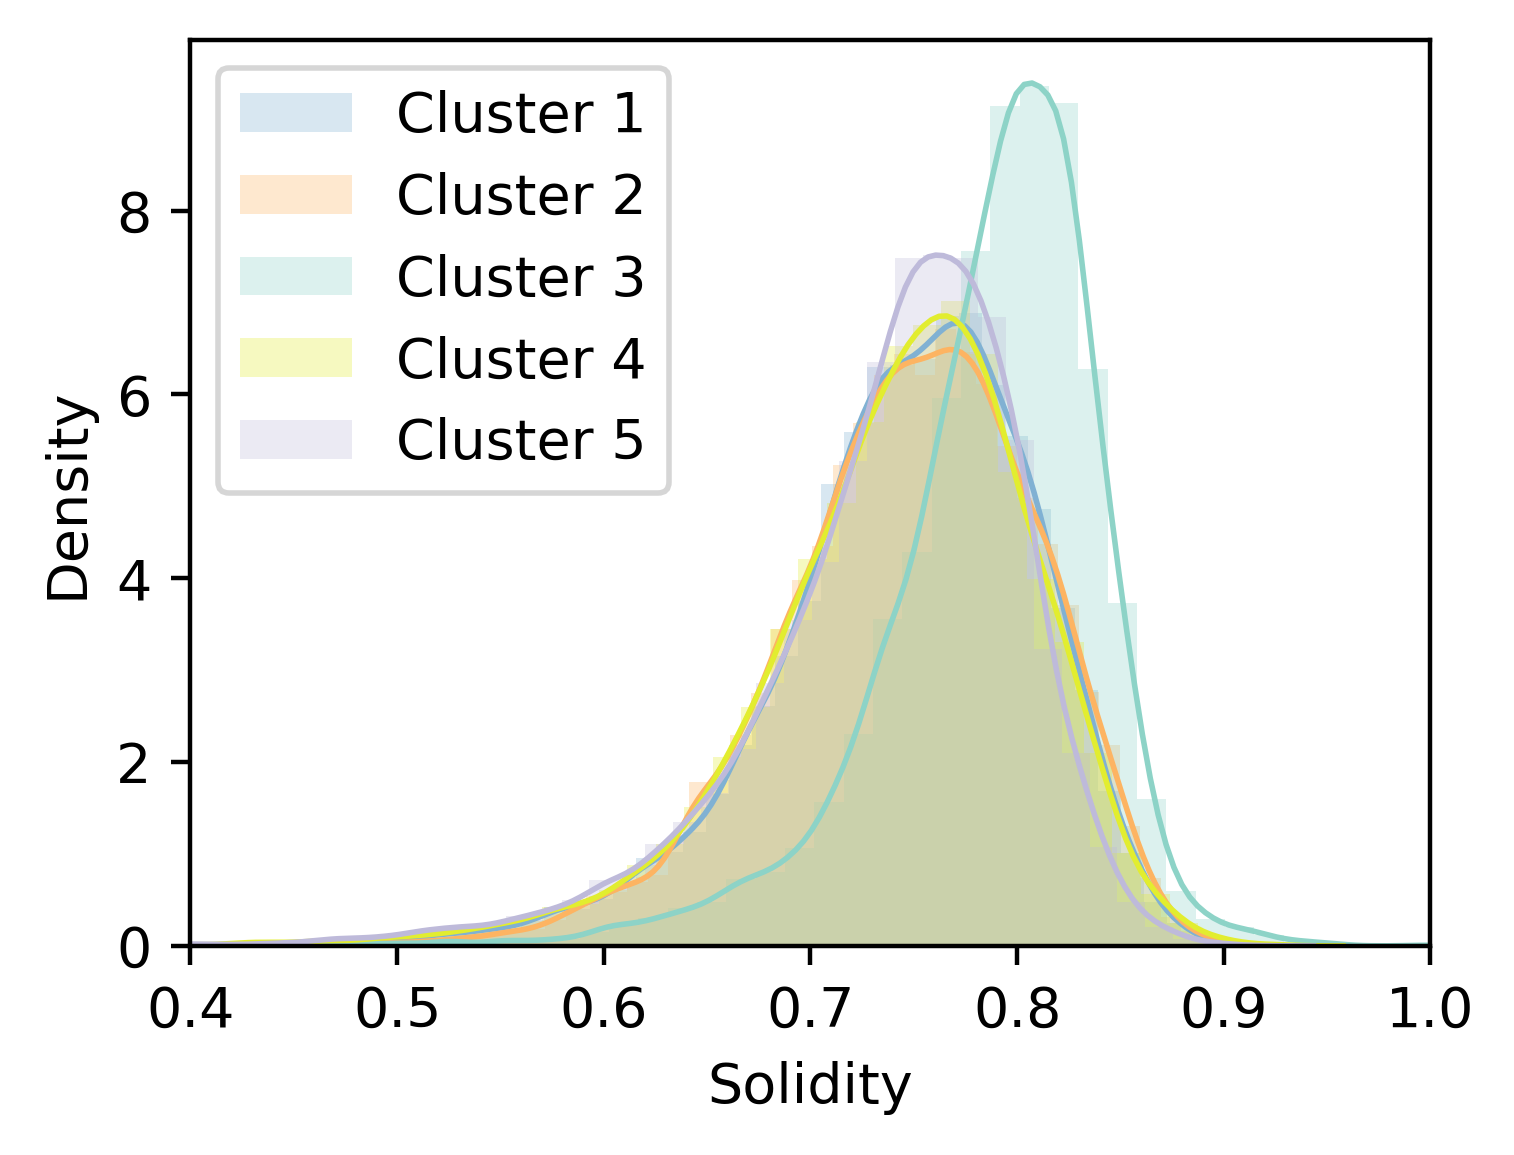

In [21]:
sol = [prop['solidity'] for prop in cluster_regprops_list]

plot_cluster_comparison(sol, 'Solidity',names)
plt.xlim([0.4,1])

In [23]:
def make_plots_of_clusters(cluster_props,cluster_names,output_folder):
    cluster_regprops_list =cluster_props

    areas = [prop['area'] for prop in cluster_regprops_list]

    names = cluster_names

    
    plot_cluster_comparison(areas,'Volume [\u03BCm\u00b3]',names)
    plt.savefig(output_folder+'area.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    bbox_area = [prop['bbox_area'] for prop in cluster_regprops_list]
    plot_cluster_comparison(bbox_area, 'Bounding Box Volume [\u03BCm\u00b3]',names)
    plt.savefig(output_folder+'bbox area.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    extent = [prop['extent'] for prop in cluster_regprops_list]
    plot_cluster_comparison(extent, 'Extent',names)
    plt.savefig(output_folder+'extent.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    feret_diam = [prop['feret_diameter_max'] for prop in cluster_regprops_list]
    plot_cluster_comparison(feret_diam, 'Maximum Feret-Diameter [\u03BCm]',names)
    plt.xlim([10,55])
    plt.savefig(output_folder+'feret diameter.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    max_int = [prop['max_intensity'] for prop in cluster_regprops_list]
    plot_cluster_comparison(max_int, 'Maximum Intensity',names)
    plt.savefig(output_folder+'max intensity.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    min_int = [prop['min_intensity'] for prop in cluster_regprops_list]
    plot_cluster_comparison(min_int, 'Minimum Intensity',names)
    plt.savefig(output_folder+'min intensity.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.xlim([100,1500])
    plt.close()
    
    mean_int = [prop['mean_intensity'] for prop in cluster_regprops_list]
    plot_cluster_comparison(mean_int, 'Mean Intensity',names)
    plt.savefig(output_folder+'mean intensity.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    stdev_int = [prop['image_stdev'] for prop in cluster_regprops_list]
    plot_cluster_comparison(stdev_int, 'Standard Deviation of Intensity',names)
    plt.savefig(output_folder+'stdev intensity.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    distance_cf = 0.69
    cent_0 = [prop['centroid-0']*distance_cf for prop in cluster_regprops_list]
    plot_cluster_comparison(cent_0, 'Location Z [\u03BCm]',names)
    plt.savefig(output_folder+'Location Z.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    cent_1 = [prop['centroid-1']*distance_cf for prop in cluster_regprops_list]
    plot_cluster_comparison(cent_1, 'Location Y [\u03BCm]',names)
    plt.savefig(output_folder+'Location Y.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.xlim([-200,800])
    plt.close()
    
    cent_2 = [prop['centroid-2']*distance_cf for prop in cluster_regprops_list]
    plot_cluster_comparison(cent_2, 'Location X [\u03BCm]',names)
    plt.xlim([0,550])
    plt.savefig(output_folder+'Location X.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    avg_dist = [prop['avg distance of 6 closest points'] for prop in cluster_regprops_list]
    plot_cluster_comparison(avg_dist, 'Avg. Distance to 6 Neighbours [\u03BCm]',names)
    plt.xlim([5,45])
    plt.savefig(output_folder+'Avg. Distance to 6 Neighbours.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    stdev_dist = [prop['stddev distance of 6 closest points'] for prop in cluster_regprops_list]
    plot_cluster_comparison(stdev_dist, 'Std. Dev. to 6 Neighbours [\u03BCm]',names)
    plt.savefig(output_folder+'stdev Distance to 6 Neighbours.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.xlim([0,6])
    plt.close()
    
    tnc = [prop['touching neighbor count'] for prop in cluster_regprops_list]
    plot_cluster_comparison_tnc(tnc, 'Touching Neighbour Count',names, bins = range(31), 
                        kwargs = dict(hist_kws={'alpha':0.3}, 
                                      kde_kws={'linewidth':1, 
                                              'bw':0.2}))
    plt.savefig(output_folder+'touching neighbour count.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    aspect = [prop['aspect_ratio'] for prop in cluster_regprops_list]
    plot_cluster_comparison(aspect, 'Aspect Ratio',names)
    plt.savefig(output_folder+'aspect ratio.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    
    sol = [prop['solidity'] for prop in cluster_regprops_list]

    plot_cluster_comparison(sol, 'Solidity',names)
    plt.xlim([0.4,1])
    plt.savefig(output_folder+'solidity.png', dpi =  400, format = 'png', bbox_inches = 'tight')
    plt.close()
    


In [24]:
plot_folder = tc.get_folder_path('plot folder')
make_plots_of_clusters(cluster_regprops_list,cluster_names = names,output_folder=plot_folder)

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\a

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(lund_combined_thesis_props)

predictions = predictions_k2_to_8[3]

import umap 
embedder = umap.UMAP(n_neighbors=400, n_components=2,random_state=42, min_dist=0.0)
embedding_2D = embedder.fit_transform(scaled)



Text(0, 0.5, 'UMAP d2')

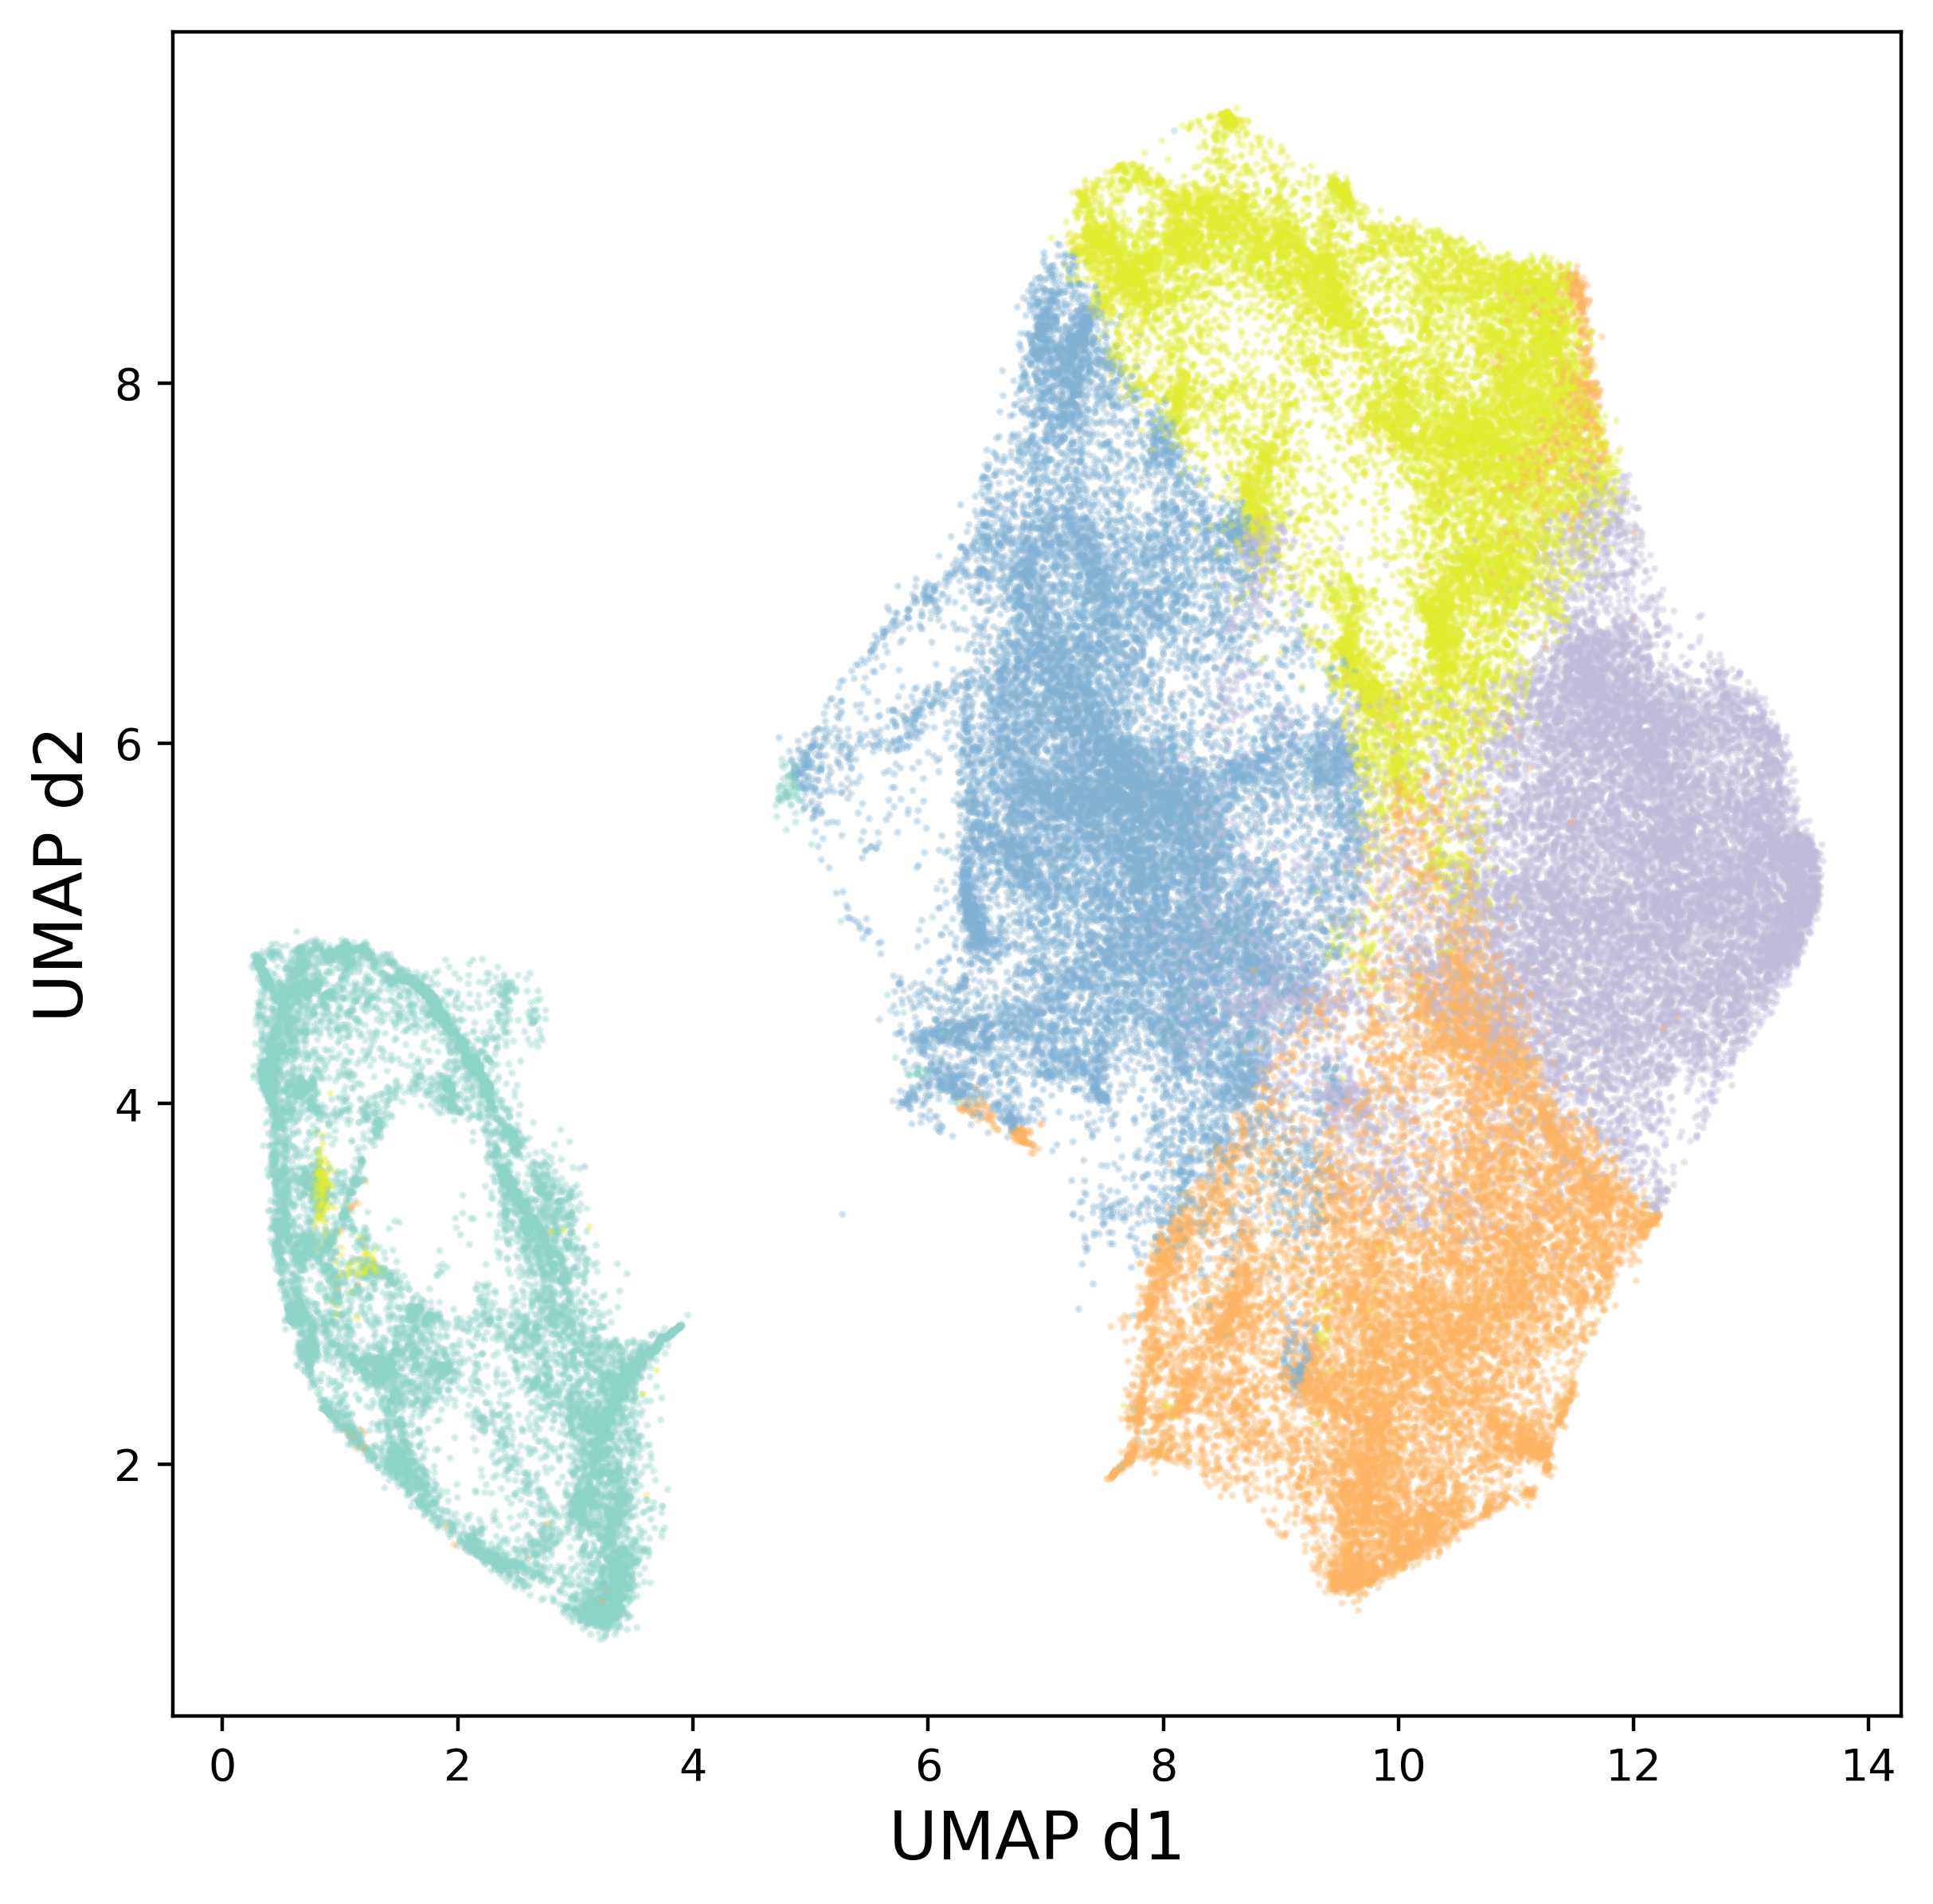

In [25]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

spot_size = 0.5
font_size_title = 18
font_size_axis = 15

fig, axs = plt.subplots(1,1, figsize = (7,7))
axs.scatter(embedding_2D[:,0],embedding_2D[:,1], 
            s = spot_size, alpha = 0.3, 
            c = [cmap_plots[i] for i in predictions])

axs.set_xlabel('UMAP d1', fontsize =font_size_axis)
axs.set_ylabel('UMAP d2', fontsize =font_size_axis)

In [23]:
np.save(saved_folder+'2D embedding nneigh 400, mindist 0',embedding_2D)